
# Problem 1


Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs.

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

In [1]:
##
##

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
##
##

from google.colab import files
uploaded = files.upload()

Saving compactiv.xlsx to compactiv.xlsx


In [3]:
##
##

comp1 = pd.read_excel("compactiv.xlsx")
comp1.head(10)

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90
5,0,0,1201,65,61,0.4,0.4,NaN,58703.0,0.0,...,0.0,0.0,0.0,0.0,28.40,34.40,Not_CPU_Bound,6854,1877461,96
6,1,0,5744,168,190,0.2,0.2,NaN,189975.0,6.0,...,0.0,4.4,0.6,0.6,27.40,28.60,Not_CPU_Bound,312,1013458,89
7,21,18,2799,291,211,0.6,0.4,NaN,259868.0,2.6,...,0.0,0.0,1.0,1.0,35.40,71.00,CPU_Bound,87,13,0
8,0,0,264,42,33,0.2,0.2,NaN,10116.0,0.0,...,0.0,0.0,0.4,0.8,15.63,18.44,Not_CPU_Bound,1374,1749756,98
9,0,0,188,13,24,0.2,0.2,NaN,6777.0,0.0,...,0.0,0.0,0.0,0.0,15.60,16.80,Not_CPU_Bound,5310,1859912,98


### Part 1


In [4]:
##
##

comp1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lread,8192.0,NaN,NaN,NaN,19.559692,53.353799,0.0,2.0,7.0,20.0,1845.0
lwrite,8192.0,NaN,NaN,NaN,13.106201,29.891726,0.0,0.0,1.0,10.0,575.0
scall,8192.0,NaN,NaN,NaN,2306.318237,1633.617322,109.0,1012.0,2051.5,3317.25,12493.0
sread,8192.0,NaN,NaN,NaN,210.47998,198.980146,6.0,86.0,166.0,279.0,5318.0
swrite,8192.0,NaN,NaN,NaN,150.058228,160.47898,7.0,63.0,117.0,185.0,5456.0
fork,8192.0,NaN,NaN,NaN,1.884554,2.479493,0.0,0.4,0.8,2.2,20.12
exec,8192.0,NaN,NaN,NaN,2.791998,5.212456,0.0,0.2,1.2,2.8,59.56
rchar,8088.0,NaN,NaN,NaN,197385.728363,239837.493526,278.0,34091.5,125473.5,267828.75,2526649.0
wchar,8177.0,NaN,NaN,NaN,95902.992785,140841.707911,1498.0,22916.0,46619.0,106101.0,1801623.0
pgout,8192.0,NaN,NaN,NaN,2.285317,5.307038,0.0,0.0,0.0,2.4,81.44


In [5]:
##
##

comp1.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [6]:
##
##

comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [7]:
##
##

comp1.shape

(8192, 22)

In [8]:
##
##

comp1.duplicated().sum()

0

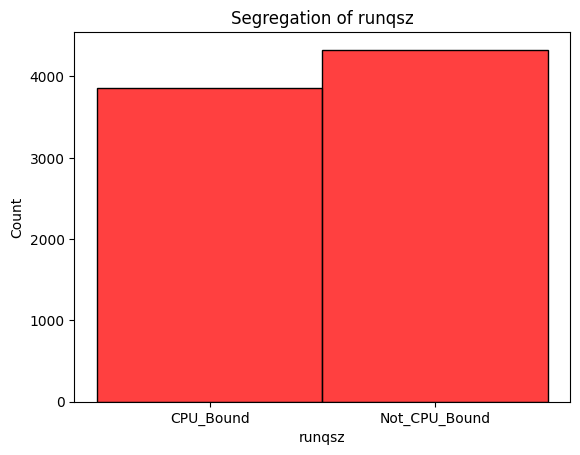

In [9]:
##
## The runqsz histplot shows count of each category, the count seems to be balanced and not skewed

sns.histplot(data = comp1, x = 'runqsz', color = 'r', orientation = 'horizontal')
plt.title("Segregation of runqsz")
plt.show()

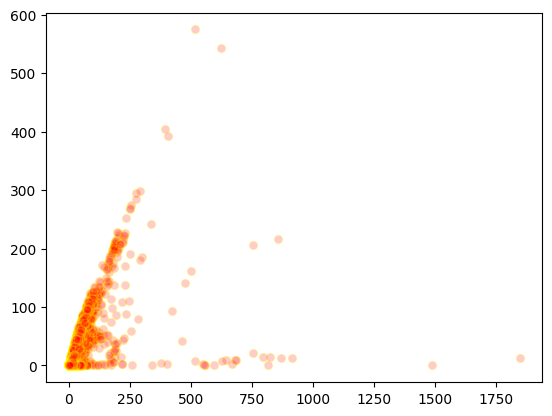

In [10]:
##
## Plotting a scatter plot for lread and lwrite
## the scatter plot shows a very moderate positive connect between the respective variables.

plt.scatter(comp1['lread'], comp1['lwrite'], alpha = 0.2, edgecolor = 'yellow', color = 'red')

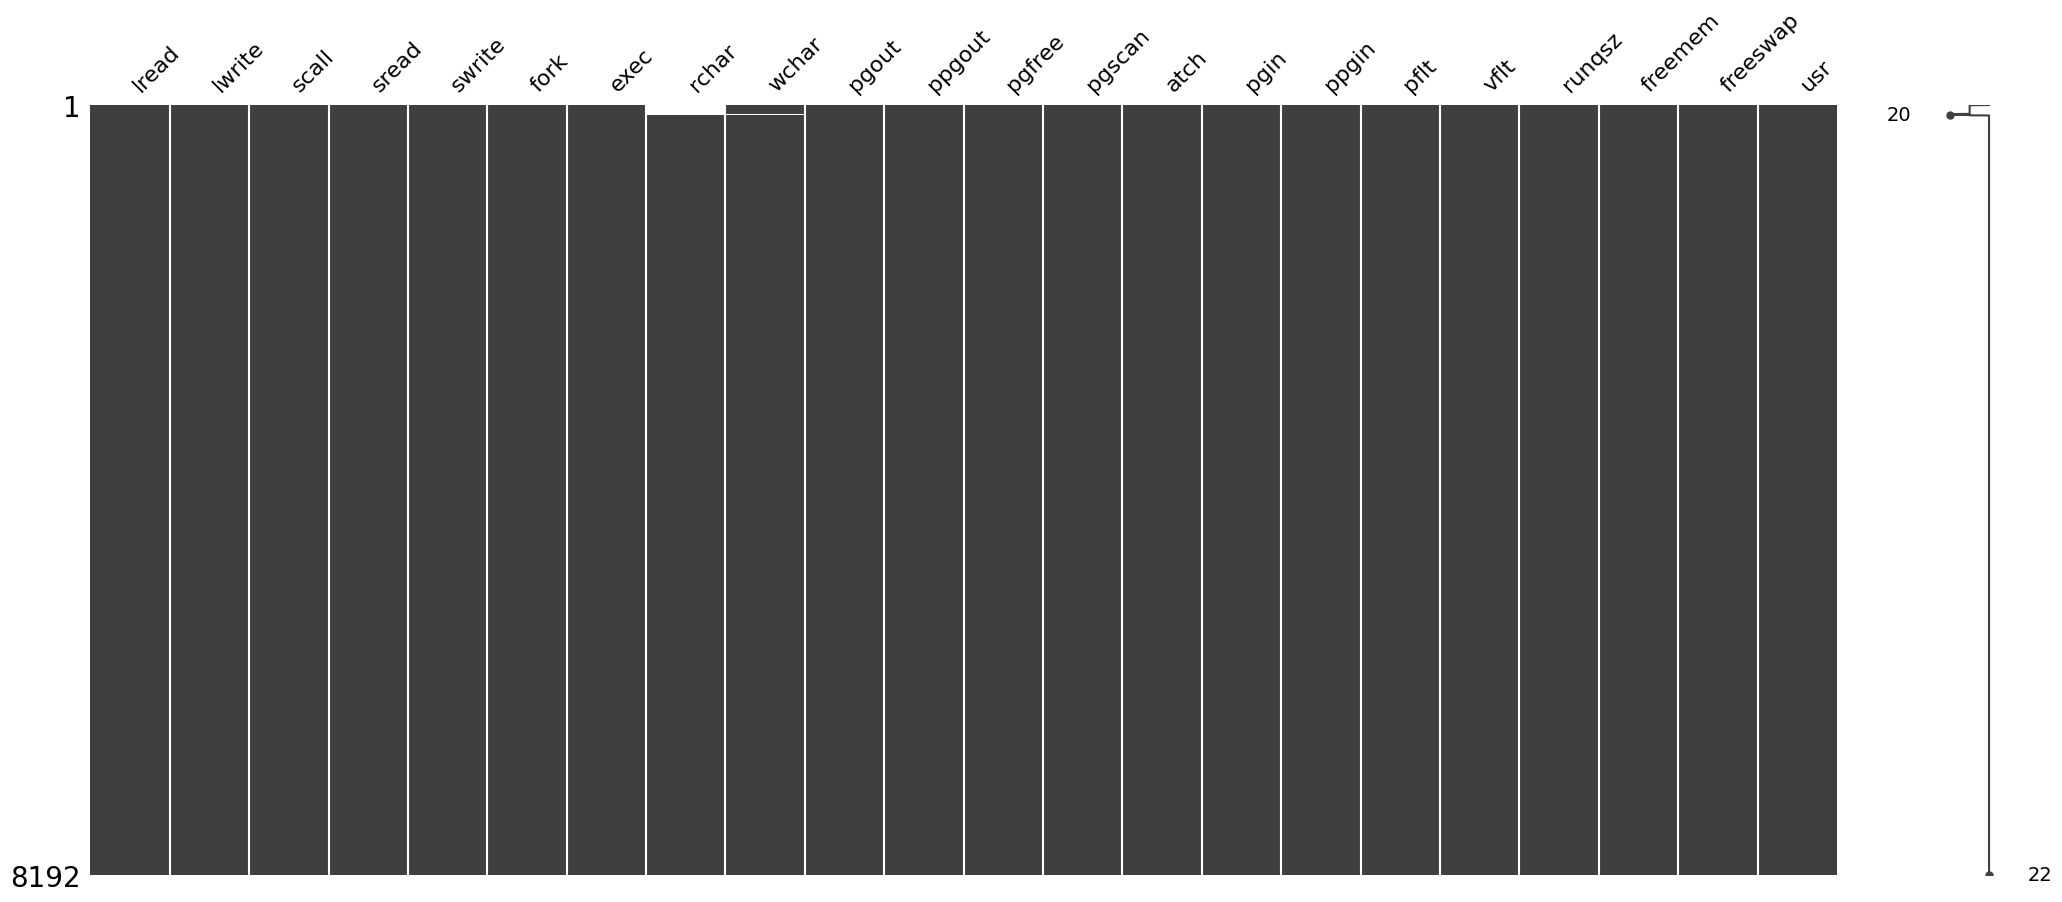

In [11]:
##
## importing missingno library to run
## the data only has missing values in two variabeles they are 'rchar' and 'wchar'
## the spread is not whole but only concentrated at the beginning

import missingno as msno

msno.matrix(comp1)
plt.show()

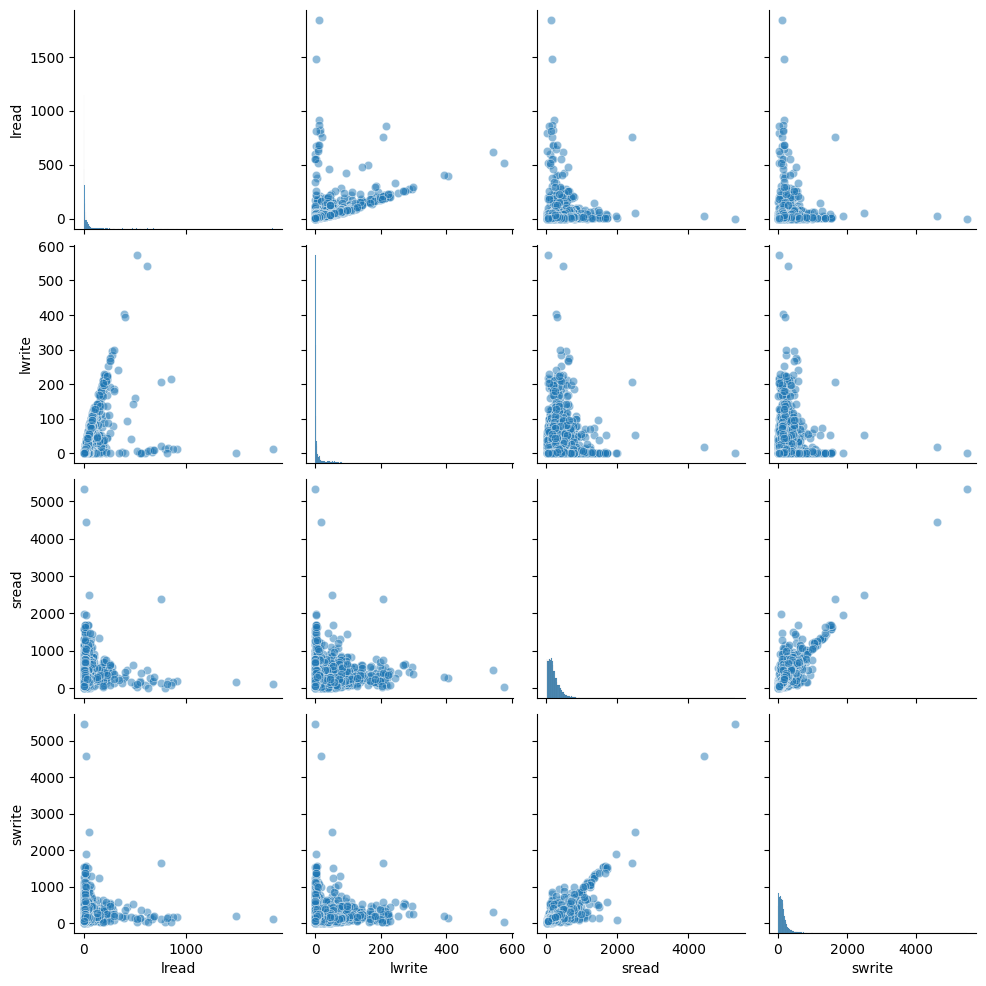

In [12]:
##
## pairplot

sns.pairplot(comp1[['lread', 'lwrite', 'sread', 'swrite']], kind = 'scatter', plot_kws={'alpha':0.5}) ## map = 'red', edgecolor = 'yellow')

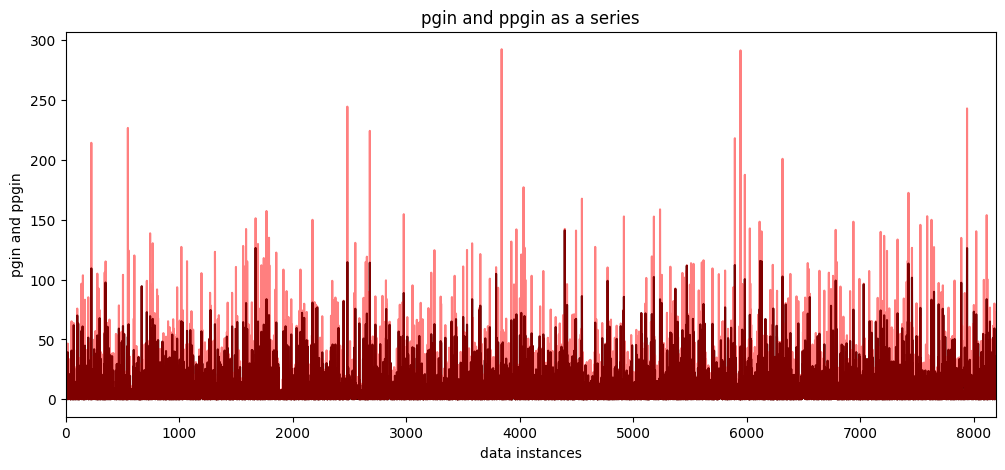

In [13]:
##
## time series plot for pgin and ppgin

plt.figure(figsize = (12, 5))
plt.plot(comp1['pgin'], color = 'black', alpha = 1)
plt.plot(comp1['ppgin'], color = 'red', alpha = 0.5)
plt.xlim(0, len(comp1) - 1)
plt.ylabel("pgin and ppgin")
plt.xlabel("data instances")
plt.title("pgin and ppgin as a series")
plt.show()

<ipython-input-14-245f6d036f48>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  comp1_corr = comp1.corr()


<Axes: >

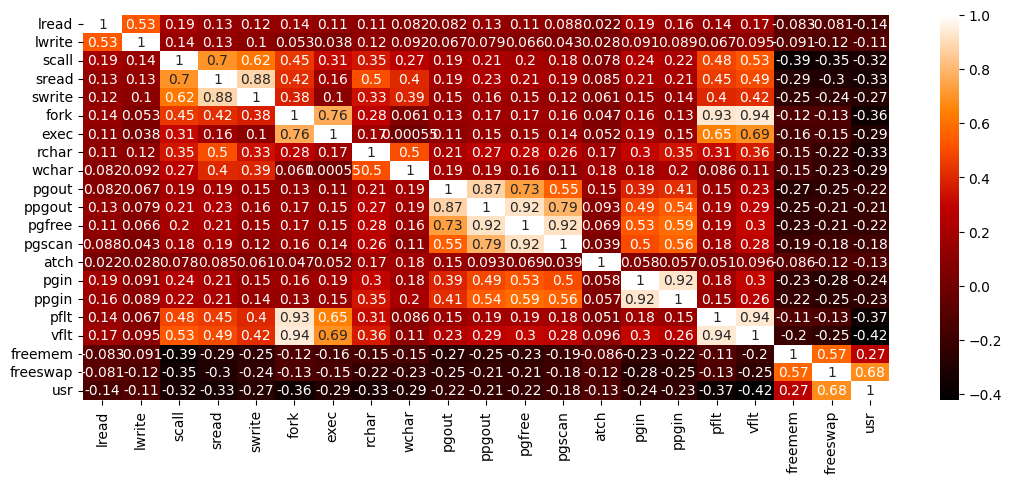

In [14]:
##
##

comp1_corr = comp1.corr()

plt.figure(figsize = (13, 5))
sns.heatmap(comp1_corr, annot = True, cmap = 'gist_heat')

<Axes: >

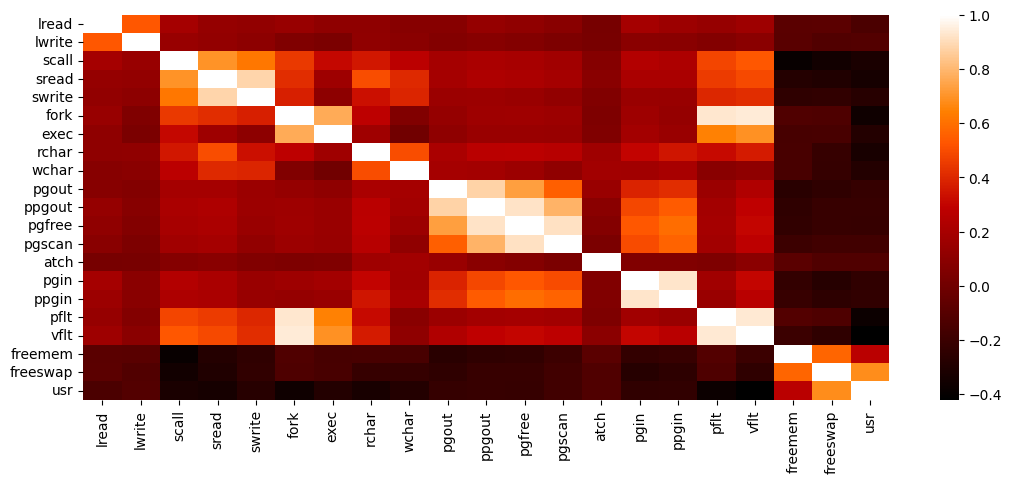

In [15]:
##
## This is basically a correlation matix in an image.

plt.figure(figsize = (13, 5))
sns.heatmap(comp1_corr, cmap = 'gist_heat')

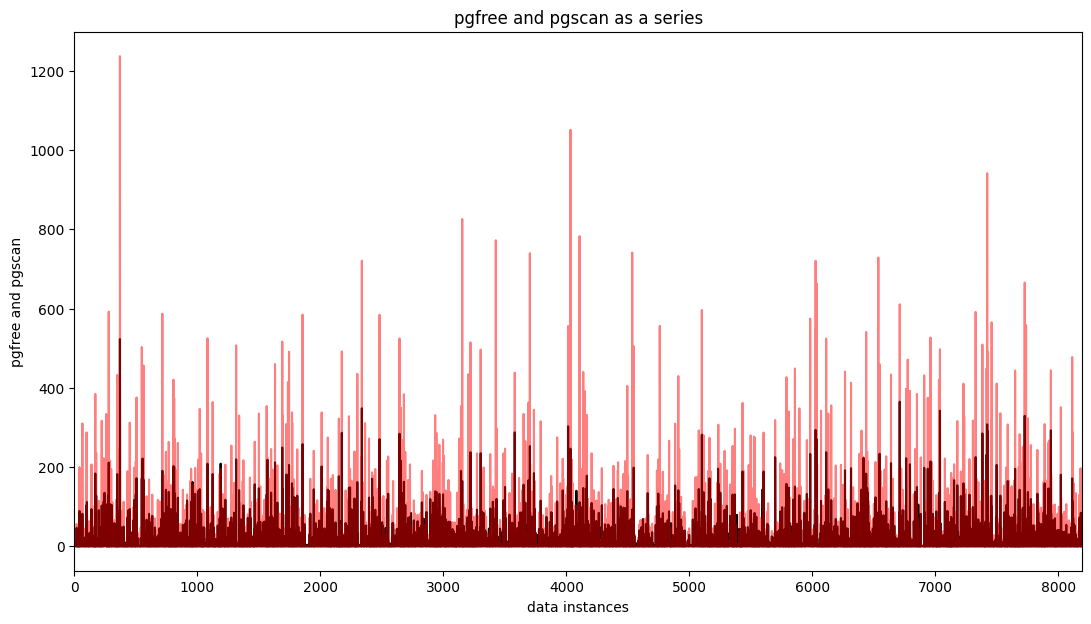

In [16]:
##
##

plt.figure(figsize = (13, 7))
plt.plot(comp1['pgfree'], color = 'black', alpha = 1)
plt.plot(comp1['pgscan'], color = 'red', alpha = 0.5)
plt.xlim(0, len(comp1) - 1)
plt.ylabel("pgfree and pgscan")
plt.xlabel("data instances")
plt.title("pgfree and pgscan as a series")
plt.show()

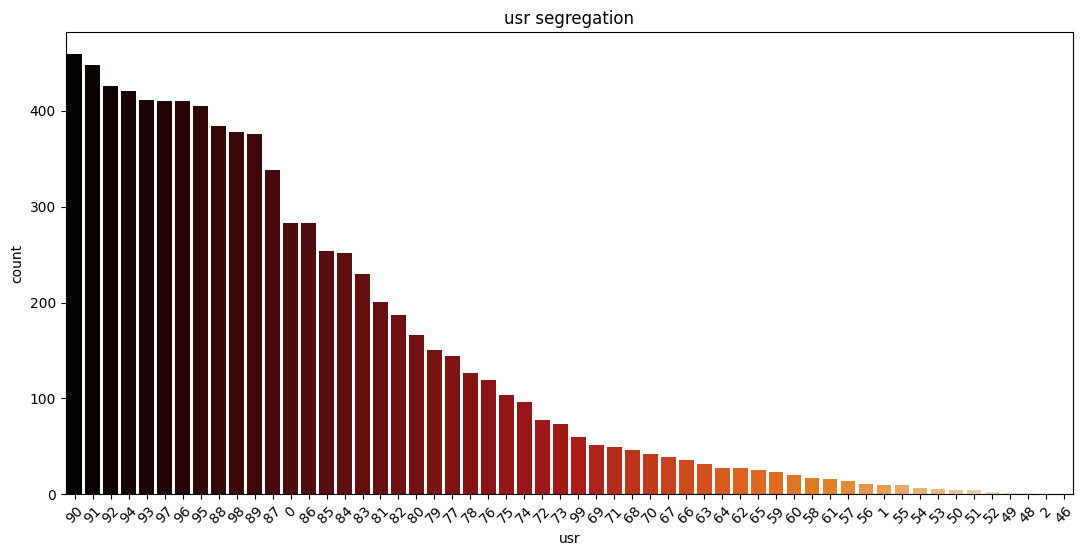

In [17]:
##
##

plt.figure(figsize = (13, 6))
sns.countplot(x = 'usr', data = comp1, order = comp1['usr'].value_counts().index, palette='gist_heat')
plt.xticks(rotation=45)
plt.title("usr segregation")
plt.show()

### Part 2

- Lets first work on the null values and then we will focus on the zero value

In [18]:
##
##

comp1.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [19]:
##
##

comp1['rchar'].head()

0    40671.0
1      448.0
2        NaN
3        NaN
4        NaN
Name: rchar, dtype: float64

In [20]:
##
##

comp1['rchar'].describe()

count    8.088000e+03
mean     1.973857e+05
std      2.398375e+05
min      2.780000e+02
25%      3.409150e+04
50%      1.254735e+05
75%      2.678288e+05
max      2.526649e+06
Name: rchar, dtype: float64

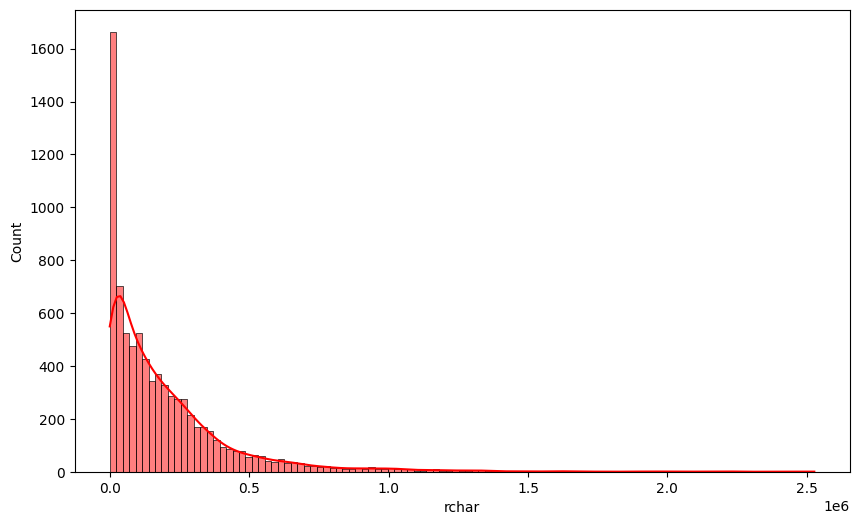

In [21]:
##
##

plt.figure(figsize = (10, 6))
ax = sns.histplot(data = comp1, x = 'rchar', kde = True, color = 'r')

plt.show()


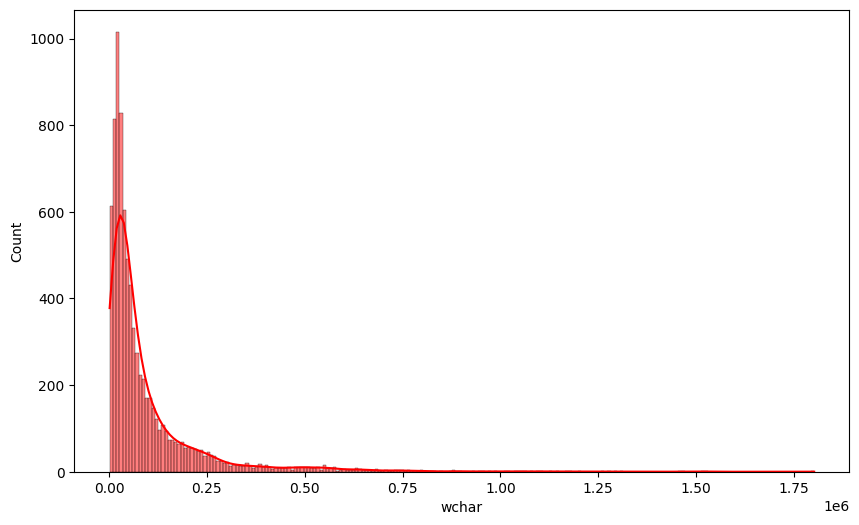

In [22]:
##
##

plt.figure(figsize = (10, 6))
ax = sns.histplot(data = comp1, x = 'wchar', kde = True, color = 'r')
plt.show()


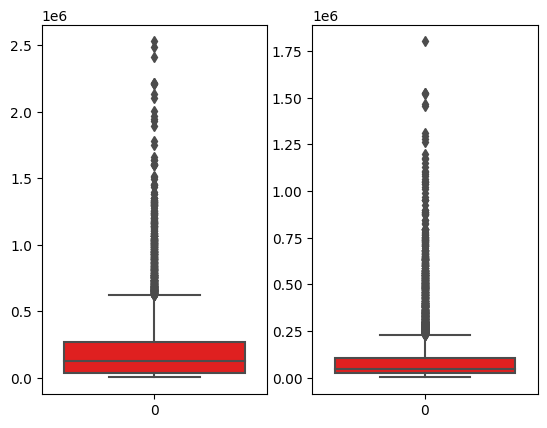

In [23]:
##
## The boxplot also corresponds the same that the data is skewed

plt.subplot(1, 2, 1)
sns.boxplot(data = comp1['rchar'], color = 'r')
plt.subplot(1, 2, 2)
sns.boxplot(data = comp1['wchar'], color = 'r')
plt.show()

In [24]:
##
## lets impute the rchar and wchar null values with the median of null values

comp1[['rchar', 'wchar']] = comp1[['rchar', 'wchar']].fillna(comp1[['rchar', 'wchar']].median())
comp1['rchar'].describe()

count    8.192000e+03
mean     1.964728e+05
std      2.384460e+05
min      2.780000e+02
25%      3.486050e+04
50%      1.254735e+05
75%      2.653948e+05
max      2.526649e+06
Name: rchar, dtype: float64

In [25]:
##
##

comp1['wchar'].describe()

count    8.192000e+03
mean     9.581275e+04
std      1.407285e+05
min      1.498000e+03
25%      2.297775e+04
50%      4.661900e+04
75%      1.060370e+05
max      1.801623e+06
Name: wchar, dtype: float64

    -lread, lwrite: These represent transfers between system and user memory. They could have zero values if no reads/writes are occurring at a given moment.
    -scall, sread, swrite, fork, exec: These represent various system calls per second. They could also have zero values if no such calls are made during a specific time frame.
    -rchar, wchar: These represent characters transferred by system read/write calls. Zero values are possible if no characters are transferred.
    -pgout, ppgout, pgin, ppgin: These involve paging requests. Zero values are possible if no paging activity is occurring.
    -pgfree, pgscan: These involve the handling of pages in memory. Zero values could occur if no pages are being placed on the free list or checked for freeing.
    -atch: This involves page attaches. Zero values could occur if no page faults are being satisfied by reclaiming a page in memory.
    -pflt, vflt: These represent specific types of page faults. Zero values could occur if no such faults are happening.
    -runqsz: This represents the process run queue size. It might not have zero values as there are typically kernel threads waiting, but it's theoretically possible.
    -freemem: This represents available memory pages. It's unlikely to be zero unless the system is under extreme load, but it's theoretically possible.
    -freeswap: This represents available disk blocks for swapping. Zero values could occur if all swap space is consumed, but it's unlikely under normal circumstances.

In [26]:
##
## now lets see about the zero values


contains_zero = ((comp1 == 0).any())
contains_zero

lread        True
lwrite       True
scall       False
sread       False
swrite      False
fork         True
exec         True
rchar       False
wchar       False
pgout        True
ppgout       True
pgfree       True
pgscan       True
atch         True
pgin         True
ppgin        True
pflt         True
vflt        False
runqsz      False
freemem     False
freeswap    False
usr          True
dtype: bool

In [27]:
##
##
## List of columns to check for zero values

## USR has very less zero values when compared to others, also since all the values in USR are only two digit integers we can allow them to be zeros.
columns_to_check = comp1.columns

zero_percentage = {col: (comp1[col] == 0).sum() / len(comp1) * 100 for col in columns_to_check if col in comp1.columns}

zero_percentage

{'lread': 8.23974609375,
 'lwrite': 32.763671875,
 'scall': 0.0,
 'sread': 0.0,
 'swrite': 0.0,
 'fork': 0.25634765625,
 'exec': 0.25634765625,
 'rchar': 0.0,
 'wchar': 0.0,
 'pgout': 59.5458984375,
 'ppgout': 59.5458984375,
 'pgfree': 59.43603515625,
 'pgscan': 78.7109375,
 'atch': 55.84716796875,
 'pgin': 14.892578125,
 'ppgin': 14.892578125,
 'pflt': 0.03662109375,
 'vflt': 0.0,
 'runqsz': 0.0,
 'freemem': 0.0,
 'freeswap': 0.0,
 'usr': 3.45458984375}

In [28]:
##
##

usr_filtered = comp1[comp1['usr'].isin([0, 1, 2])]
usr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 7 to 8178
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     294 non-null    int64  
 1   lwrite    294 non-null    int64  
 2   scall     294 non-null    int64  
 3   sread     294 non-null    int64  
 4   swrite    294 non-null    int64  
 5   fork      294 non-null    float64
 6   exec      294 non-null    float64
 7   rchar     294 non-null    float64
 8   wchar     294 non-null    float64
 9   pgout     294 non-null    float64
 10  ppgout    294 non-null    float64
 11  pgfree    294 non-null    float64
 12  pgscan    294 non-null    float64
 13  atch      294 non-null    float64
 14  pgin      294 non-null    float64
 15  ppgin     294 non-null    float64
 16  pflt      294 non-null    float64
 17  vflt      294 non-null    float64
 18  runqsz    294 non-null    object 
 19  freemem   294 non-null    int64  
 20  freeswap  294 non-null    int64

In [29]:
##
##

pd.set_option('display.max_columns', None)
usr_filtered.head(20)

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
7,21,18,2799,291,211,0.60,0.40,125473.5,259868.0,2.60,4.80,4.80,0.00,0.00,1.00,1.00,35.40,71.00,CPU_Bound,87,13,0
32,6,1,2414,249,163,1.20,3.60,125473.5,472149.0,2.00,2.60,2.60,0.80,0.80,11.00,15.80,61.00,133.40,CPU_Bound,89,10,0
51,50,65,2292,357,201,0.40,1.80,125473.5,75166.0,5.80,9.20,16.20,15.40,1.40,5.40,8.00,33.80,87.00,CPU_Bound,88,12,0
56,13,12,2527,254,144,0.20,0.20,125473.5,485338.0,0.00,0.00,0.00,0.00,107.58,25.95,26.15,37.72,238.12,CPU_Bound,81,19,0
63,7,2,2404,211,153,1.40,2.61,125473.5,43705.0,0.40,0.40,0.40,0.00,0.00,5.01,7.41,76.95,129.86,CPU_Bound,89,11,0
70,1,0,544,55,62,0.20,0.20,125473.5,19308.0,0.00,0.00,0.00,0.00,0.20,0.40,0.40,20.20,18.60,CPU_Bound,97,3,0
206,6,4,1532,130,55,0.60,1.00,228855.0,43159.0,0.40,0.60,0.60,0.00,0.40,0.40,0.40,54.00,114.40,CPU_Bound,93,7,0
226,13,9,1583,229,155,0.60,0.80,892724.0,877944.0,0.00,0.00,0.00,0.00,0.00,109.38,214.37,49.30,207.19,CPU_Bound,73,26,1
231,1,0,3083,219,152,0.20,0.20,107127.0,81287.0,6.00,14.60,26.80,43.60,0.40,2.40,2.60,22.60,84.20,CPU_Bound,83,16,0
238,77,101,2680,373,289,3.19,2.99,276666.0,110753.0,12.57,40.32,112.38,222.36,0.00,8.38,14.97,182.24,380.24,CPU_Bound,77,23,0


In [30]:
##
##

pgfree_filtered = comp1[comp1['pgfree'].isin([0])]
pgfree_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4869 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     4869 non-null   int64  
 1   lwrite    4869 non-null   int64  
 2   scall     4869 non-null   int64  
 3   sread     4869 non-null   int64  
 4   swrite    4869 non-null   int64  
 5   fork      4869 non-null   float64
 6   exec      4869 non-null   float64
 7   rchar     4869 non-null   float64
 8   wchar     4869 non-null   float64
 9   pgout     4869 non-null   float64
 10  ppgout    4869 non-null   float64
 11  pgfree    4869 non-null   float64
 12  pgscan    4869 non-null   float64
 13  atch      4869 non-null   float64
 14  pgin      4869 non-null   float64
 15  ppgin     4869 non-null   float64
 16  pflt      4869 non-null   float64
 17  vflt      4869 non-null   float64
 18  runqsz    4869 non-null   object 
 19  freemem   4869 non-null   int64  
 20  freeswap  4869 non-null   int6

In [31]:
##
##

comp1.describe()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.192000e+03,8.192000e+03,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.192000e+03,8192.000000
mean,19.559692,13.106201,2306.318237,210.479980,150.058228,1.884554,2.791998,1.964728e+05,9.581275e+04,2.285317,5.977229,11.919712,21.526849,1.127505,8.277960,12.388586,109.793799,185.315796,1763.456299,1.328126e+06,83.968872
std,53.353799,29.891726,1633.617322,198.980146,160.478980,2.479493,5.212456,2.384460e+05,1.407285e+05,5.307038,15.214590,32.363520,71.141340,5.708347,13.874978,22.281318,114.419221,191.000603,2482.104511,4.220194e+05,18.401905
min,0.000000,0.000000,109.000000,6.000000,7.000000,0.000000,0.000000,2.780000e+02,1.498000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,55.000000,2.000000e+00,0.000000
25%,2.000000,0.000000,1012.000000,86.000000,63.000000,0.400000,0.200000,3.486050e+04,2.297775e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.600000,25.000000,45.400000,231.000000,1.042624e+06,81.000000
50%,7.000000,1.000000,2051.500000,166.000000,117.000000,0.800000,1.200000,1.254735e+05,4.661900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,2.800000,3.800000,63.800000,120.400000,579.000000,1.289290e+06,89.000000
75%,20.000000,10.000000,3317.250000,279.000000,185.000000,2.200000,2.800000,2.653948e+05,1.060370e+05,2.400000,4.200000,5.000000,0.000000,0.600000,9.765000,13.800000,159.600000,251.800000,2002.250000,1.730380e+06,94.000000
max,1845.000000,575.000000,12493.000000,5318.000000,5456.000000,20.120000,59.560000,2.526649e+06,1.801623e+06,81.440000,184.200000,523.000000,1237.000000,211.580000,141.200000,292.610000,899.800000,1365.000000,12027.000000,2.243187e+06,99.000000


In [32]:
##
##

pgfree_filtered.describe()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
count,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4.869000e+03,4.869000e+03,4869.0,4869.0,4869.0,4869.0,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4.869000e+03,4869.000000
mean,16.268433,11.670364,1909.615732,171.468474,124.796878,1.494933,1.908605,1.660867e+05,8.519741e+04,0.0,0.0,0.0,0.0,0.515410,4.807913,6.849333,93.024340,143.512300,2793.216882,1.464549e+06,87.488601
std,48.403166,28.227404,1540.888229,164.076127,132.044344,1.983854,3.310090,2.123331e+05,1.319643e+05,0.0,0.0,0.0,0.0,6.693227,9.309027,13.576019,99.841512,155.546408,2773.185437,4.024643e+05,15.401932
min,0.000000,0.000000,109.000000,6.000000,7.000000,0.000000,0.000000,2.780000e+02,1.498000e+03,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,64.000000,3.000000e+00,0.000000
25%,1.000000,0.000000,601.000000,60.000000,44.000000,0.200000,0.200000,2.106000e+04,1.825000e+04,0.0,0.0,0.0,0.0,0.000000,0.200000,0.200000,18.400000,28.000000,686.000000,1.075200e+06,86.000000
50%,5.000000,1.000000,1575.000000,131.000000,91.000000,0.600000,0.800000,9.953700e+04,3.879200e+04,0.0,0.0,0.0,0.0,0.000000,1.400000,1.600000,51.090000,86.400000,1423.000000,1.616242e+06,91.000000
75%,16.000000,9.000000,2756.000000,229.000000,157.000000,2.000000,2.200000,2.328030e+05,9.605000e+04,0.0,0.0,0.0,0.0,0.000000,5.200000,7.410000,134.600000,194.000000,4490.000000,1.781096e+06,95.000000
max,1486.000000,575.000000,9304.000000,1949.000000,1888.000000,17.030000,38.800000,2.408325e+06,1.523413e+06,0.0,0.0,0.0,0.0,211.580000,115.570000,214.370000,745.290000,1324.650000,12027.000000,2.243187e+06,99.000000


In [33]:
##
##

pgfree_filtered.head(20)

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.20,0.20,40671.0,53995.0,0.0,0.0,0.0,0.0,0.0,1.60,2.60,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.20,0.20,448.0,8385.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.00,2.40,125473.5,31950.0,0.0,0.0,0.0,0.0,1.2,6.00,9.40,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.20,0.20,125473.5,8670.0,0.0,0.0,0.0,0.0,0.0,0.20,0.20,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.40,0.40,125473.5,12185.0,0.0,0.0,0.0,0.0,0.0,1.00,1.20,37.80,47.60,Not_CPU_Bound,633,1760253,90
5,0,0,1201,65,61,0.40,0.40,125473.5,58703.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,28.40,34.40,Not_CPU_Bound,6854,1877461,96
8,0,0,264,42,33,0.20,0.20,125473.5,10116.0,0.0,0.0,0.0,0.0,0.0,0.40,0.80,15.63,18.44,Not_CPU_Bound,1374,1749756,98
9,0,0,188,13,24,0.20,0.20,125473.5,6777.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,15.60,16.80,Not_CPU_Bound,5310,1859912,98
10,4,1,1983,191,152,0.80,0.80,125473.5,170579.0,0.0,0.0,0.0,0.0,0.0,1.20,1.60,65.00,65.60,CPU_Bound,1143,1535661,90
12,25,9,4174,245,135,4.20,9.20,125473.5,42433.0,0.0,0.0,0.0,0.0,0.2,20.80,23.60,295.00,408.80,CPU_Bound,2630,1524755,75


In [34]:
##
## if pgfree is zero then pgout and ppgout is also zero
## so basically half of these values were zero yet we could see some very high USR values, see the below plot for reference.


pgfree_filtered_check = pgfree_filtered[['pgout', 'ppgout']].eq(0).all()
pgfree_filtered_check

pgout     True
ppgout    True
dtype: bool

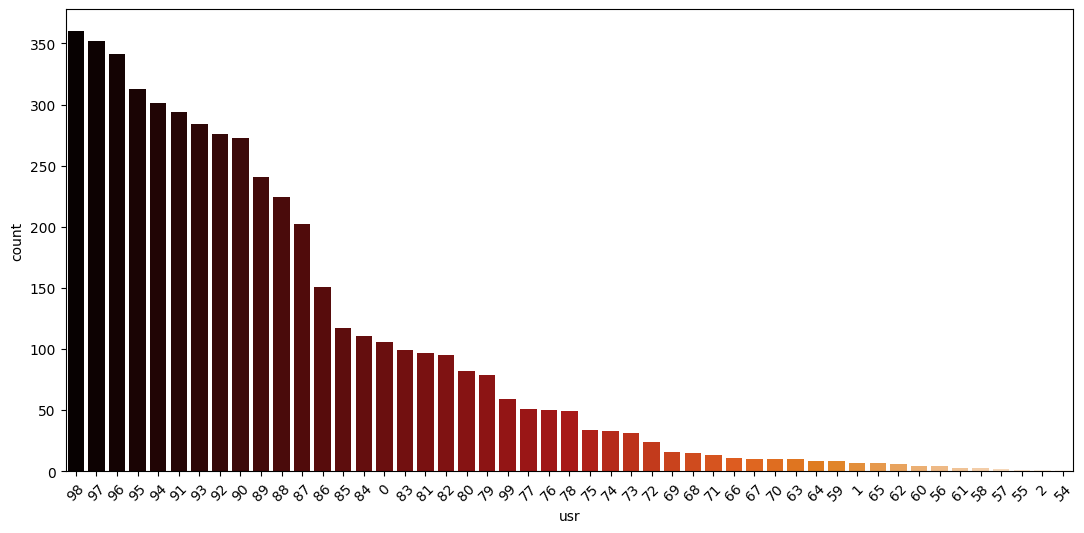

In [35]:
##
##

plt.figure(figsize = (13, 6))
sns.countplot(x = 'usr', data = pgfree_filtered, order = pgfree_filtered['usr'].value_counts().index, palette='gist_heat')
plt.xticks(rotation=45)
plt.show()

In [36]:
##
## best i can think of is removing those features having more than 50% of its value as zeroes.

comp2 = comp1.drop(columns = ['pgout', 'ppgout', 'pgfree', 'pgscan', 'atch'])

In [37]:
##
##
comp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgin      8192 non-null   float64
 10  ppgin     8192 non-null   float64
 11  pflt      8192 non-null   float64
 12  vflt      8192 non-null   float64
 13  runqsz    8192 non-null   object 
 14  freemem   8192 non-null   int64  
 15  freeswap  8192 non-null   int64  
 16  usr       8192 non-null   int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 1.1+ MB


In [38]:
##
##
comp2.describe()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.192000e+03,8.192000e+03,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.192000e+03,8192.000000
mean,19.559692,13.106201,2306.318237,210.479980,150.058228,1.884554,2.791998,1.964728e+05,9.581275e+04,8.277960,12.388586,109.793799,185.315796,1763.456299,1.328126e+06,83.968872
std,53.353799,29.891726,1633.617322,198.980146,160.478980,2.479493,5.212456,2.384460e+05,1.407285e+05,13.874978,22.281318,114.419221,191.000603,2482.104511,4.220194e+05,18.401905
min,0.000000,0.000000,109.000000,6.000000,7.000000,0.000000,0.000000,2.780000e+02,1.498000e+03,0.000000,0.000000,0.000000,0.200000,55.000000,2.000000e+00,0.000000
25%,2.000000,0.000000,1012.000000,86.000000,63.000000,0.400000,0.200000,3.486050e+04,2.297775e+04,0.600000,0.600000,25.000000,45.400000,231.000000,1.042624e+06,81.000000
50%,7.000000,1.000000,2051.500000,166.000000,117.000000,0.800000,1.200000,1.254735e+05,4.661900e+04,2.800000,3.800000,63.800000,120.400000,579.000000,1.289290e+06,89.000000
75%,20.000000,10.000000,3317.250000,279.000000,185.000000,2.200000,2.800000,2.653948e+05,1.060370e+05,9.765000,13.800000,159.600000,251.800000,2002.250000,1.730380e+06,94.000000
max,1845.000000,575.000000,12493.000000,5318.000000,5456.000000,20.120000,59.560000,2.526649e+06,1.801623e+06,141.200000,292.610000,899.800000,1365.000000,12027.000000,2.243187e+06,99.000000


In [39]:
##
##

## Lwrite is still moedrately hight at 32 percent


columns_to_check2 = comp2.columns

zero_percentage2 = {col: (comp2[col] == 0).sum() / len(comp2) * 100 for col in columns_to_check if col in comp2.columns}

zero_percentage2

{'lread': 8.23974609375,
 'lwrite': 32.763671875,
 'scall': 0.0,
 'sread': 0.0,
 'swrite': 0.0,
 'fork': 0.25634765625,
 'exec': 0.25634765625,
 'rchar': 0.0,
 'wchar': 0.0,
 'pgin': 14.892578125,
 'ppgin': 14.892578125,
 'pflt': 0.03662109375,
 'vflt': 0.0,
 'runqsz': 0.0,
 'freemem': 0.0,
 'freeswap': 0.0,
 'usr': 3.45458984375}

In [40]:
##
##
## lets see what we can do about lwrite, lets see if we can reduce the percentage


lwrite_filtered = comp1[comp1['lwrite'].isin([0])]
lwrite_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2684 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     2684 non-null   int64  
 1   lwrite    2684 non-null   int64  
 2   scall     2684 non-null   int64  
 3   sread     2684 non-null   int64  
 4   swrite    2684 non-null   int64  
 5   fork      2684 non-null   float64
 6   exec      2684 non-null   float64
 7   rchar     2684 non-null   float64
 8   wchar     2684 non-null   float64
 9   pgout     2684 non-null   float64
 10  ppgout    2684 non-null   float64
 11  pgfree    2684 non-null   float64
 12  pgscan    2684 non-null   float64
 13  atch      2684 non-null   float64
 14  pgin      2684 non-null   float64
 15  ppgin     2684 non-null   float64
 16  pflt      2684 non-null   float64
 17  vflt      2684 non-null   float64
 18  runqsz    2684 non-null   object 
 19  freemem   2684 non-null   int64  
 20  freeswap  2684 non-null   int6

In [41]:
##
##

## so basically not all instances of zero lwrite leads to zero lread
## that means it might not be the case about imputing for lread and lwrite, we can try binning them but then we might have to do the same for all the features
## what can be done??

lwrite_filtered_check = lwrite_filtered[['lread']].eq(0).all()
lwrite_filtered_check

lread    False
dtype: bool

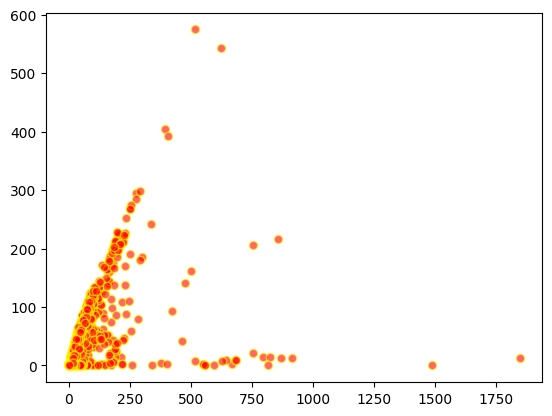

In [42]:
##
## The scatter plot is being brought up again, here we can see that the is generally a patter of higher read and higher write

plt.scatter(x = comp1['lread'], y = comp1['lwrite'], color = 'r', edgecolor = 'yellow', alpha = 0.6)
plt.show()

In [43]:
##
## lets get the correlation between them
## correlation is 53, this means it is a coin toss situation.

comp1[['lwrite', 'lread', 'usr']].corr()

,lwrite,lread,usr
lwrite,1.000000,0.533737,-0.111213
lread,0.533737,1.000000,-0.141394
usr,-0.111213,-0.141394,1.000000


In [44]:
##
## lets see the situation where i remove all the values of zero in lwrite and see how the values react

lwrite_nozero = comp1[comp1['lwrite'] != 0]
lwrite_nozero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 2 to 8190
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     5508 non-null   int64  
 1   lwrite    5508 non-null   int64  
 2   scall     5508 non-null   int64  
 3   sread     5508 non-null   int64  
 4   swrite    5508 non-null   int64  
 5   fork      5508 non-null   float64
 6   exec      5508 non-null   float64
 7   rchar     5508 non-null   float64
 8   wchar     5508 non-null   float64
 9   pgout     5508 non-null   float64
 10  ppgout    5508 non-null   float64
 11  pgfree    5508 non-null   float64
 12  pgscan    5508 non-null   float64
 13  atch      5508 non-null   float64
 14  pgin      5508 non-null   float64
 15  ppgin     5508 non-null   float64
 16  pflt      5508 non-null   float64
 17  vflt      5508 non-null   float64
 18  runqsz    5508 non-null   object 
 19  freemem   5508 non-null   int64  
 20  freeswap  5508 non-null   int6

In [45]:
##
##

dummy = lwrite_nozero[lwrite_nozero['lwrite'].isin([0])]
dummy

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr


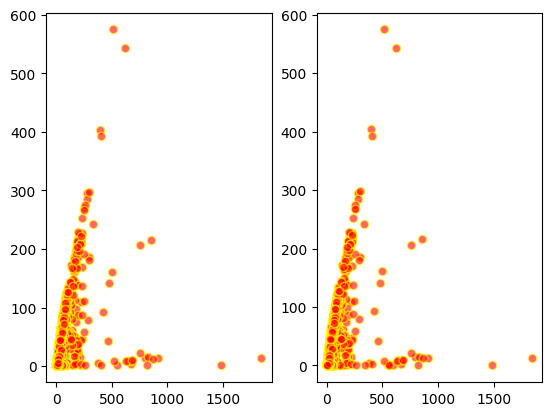

,lwrite,lread,usr
lwrite,1.000000,0.522164,-0.071316
lread,0.522164,1.000000,-0.108015
usr,-0.071316,-0.108015,1.000000


In [46]:
##
##

plt.subplot(1, 2, 1)
plt.scatter(x = lwrite_nozero['lread'], y = lwrite_nozero['lwrite'], color = 'r', edgecolor = 'yellow', alpha = 0.6)
plt.subplot(1, 2, 2)
plt.scatter(x = comp1['lread'], y = comp1['lwrite'], color = 'r', edgecolor = 'yellow', alpha = 0.6)
plt.show()

lwrite_nozero[['lwrite', 'lread', 'usr']].corr()

In [47]:
##
##

lread_lwrite_nozero = comp1[(comp1['lwrite'] != 0) & (comp1['lread'] != 0)]
lread_lwrite_nozero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 2 to 8190
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     5508 non-null   int64  
 1   lwrite    5508 non-null   int64  
 2   scall     5508 non-null   int64  
 3   sread     5508 non-null   int64  
 4   swrite    5508 non-null   int64  
 5   fork      5508 non-null   float64
 6   exec      5508 non-null   float64
 7   rchar     5508 non-null   float64
 8   wchar     5508 non-null   float64
 9   pgout     5508 non-null   float64
 10  ppgout    5508 non-null   float64
 11  pgfree    5508 non-null   float64
 12  pgscan    5508 non-null   float64
 13  atch      5508 non-null   float64
 14  pgin      5508 non-null   float64
 15  ppgin     5508 non-null   float64
 16  pflt      5508 non-null   float64
 17  vflt      5508 non-null   float64
 18  runqsz    5508 non-null   object 
 19  freemem   5508 non-null   int64  
 20  freeswap  5508 non-null   int6

In [48]:
##
##

dummy = lread_lwrite_nozero[lread_lwrite_nozero['lwrite'].isin([0])]
dummy

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr


In [49]:
##
##

dummy = lread_lwrite_nozero[lread_lwrite_nozero['lread'].isin([0])]
dummy

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,ppgout,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr


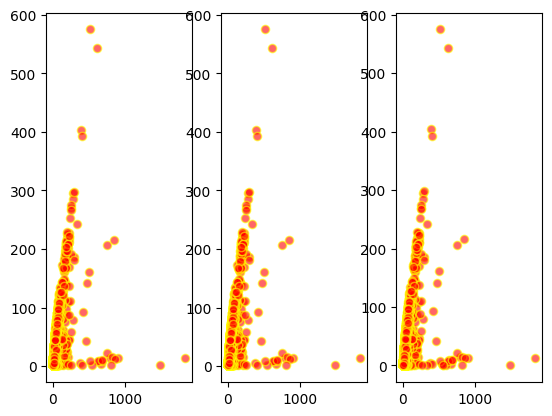

,lwrite,lread,usr
lwrite,1.000000,0.522164,-0.071316
lread,0.522164,1.000000,-0.108015
usr,-0.071316,-0.108015,1.000000


In [50]:
##
##

plt.subplot(1, 3, 1)
plt.scatter(x = lread_lwrite_nozero['lread'], y = lread_lwrite_nozero['lwrite'], color = 'r', edgecolor = 'yellow', alpha = 0.6)
plt.subplot(1, 3, 2)
plt.scatter(x = lwrite_nozero['lread'], y = lwrite_nozero['lwrite'], color = 'r', edgecolor = 'yellow', alpha = 0.6)
plt.subplot(1, 3, 3)
plt.scatter(x = comp1['lread'], y = comp1['lwrite'], color = 'r', edgecolor = 'yellow', alpha = 0.6)
plt.show()

lread_lwrite_nozero[['lwrite', 'lread', 'usr']].corr()

In [51]:
##
##

print(lread_lwrite_nozero['lread'].min())
print(lread_lwrite_nozero['lread'].max())
print(lread_lwrite_nozero['lwrite'].min())
print(lread_lwrite_nozero['lwrite'].max())


1
1845
1
575


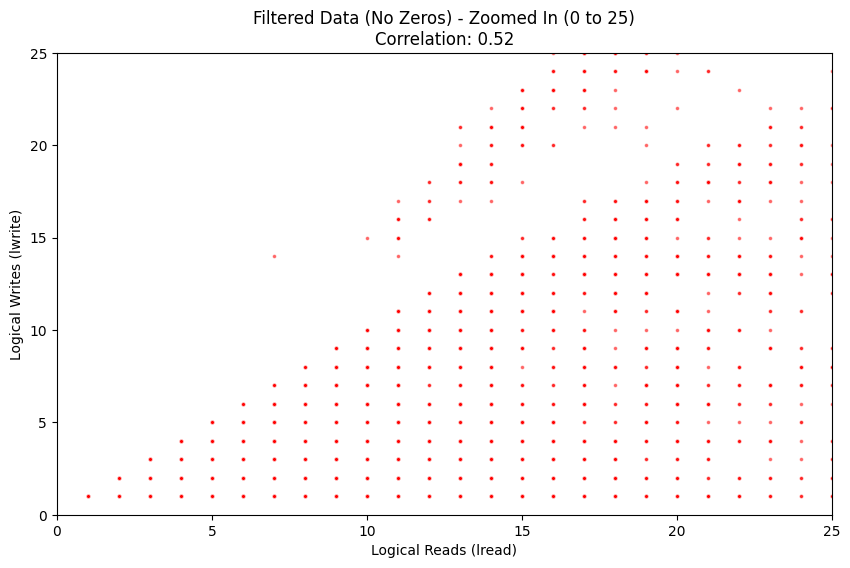

In [52]:
##
##
## Calculating the correlation coefficient for filtered data (both non-zero)
correlation_filtered = lread_lwrite_nozero['lread'].corr(lread_lwrite_nozero['lwrite'])


## Plotting the scatter plot for lread vs lwrite for filtered data (both non-zero) with small dot markers
## Zooming in further to the region between 0 and 25 on both axes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lread', y='lwrite', data=lread_lwrite_nozero, alpha=0.6, marker='.', s=30, color = 'r')
plt.title(f'Filtered Data (No Zeros) - Zoomed In (0 to 25)\nCorrelation: {correlation_filtered:.2f}')
plt.xlabel('Logical Reads (lread)')
plt.ylabel('Logical Writes (lwrite)')

## Setting the axes limits to zoom in further
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.show()

The correlation between lread and lwrite is still a cointoss figure even after removing the zero values, best to let them be as the correlation is not improving in either case.

The correlation of USR against lwrite and lread before and after removal of zeroes shows less change. Hence we can let them be as they are.

In [53]:
##
##

print(comp1[['lread', 'lwrite']].describe())
print(lread_lwrite_nozero[['lread', 'lwrite']].describe())

             lread       lwrite
count  8192.000000  8192.000000
mean     19.559692    13.106201
std      53.353799    29.891726
min       0.000000     0.000000
25%       2.000000     0.000000
50%       7.000000     1.000000
75%      20.000000    10.000000
max    1845.000000   575.000000
             lread       lwrite
count  5508.000000  5508.000000
mean     26.899419    19.492738
std      61.968493    34.705659
min       1.000000     1.000000
25%       5.000000     1.000000
50%      13.000000     5.000000
75%      29.000000    23.000000
max    1845.000000   575.000000


In [54]:
##
## lets treat the outliers

def boxplot_creator(datadata):

    data_cols = datadata.columns

    for i in data_cols:
        sns.boxplot(data = datadata[i])
        plt.title(i)
        plt.show()


In [55]:
##
##

## 'runsqz get_dummies' is placed here to run the boxplots sequently


comp1 = pd.get_dummies(comp1, columns = ['runqsz'])
comp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lread                 8192 non-null   int64  
 1   lwrite                8192 non-null   int64  
 2   scall                 8192 non-null   int64  
 3   sread                 8192 non-null   int64  
 4   swrite                8192 non-null   int64  
 5   fork                  8192 non-null   float64
 6   exec                  8192 non-null   float64
 7   rchar                 8192 non-null   float64
 8   wchar                 8192 non-null   float64
 9   pgout                 8192 non-null   float64
 10  ppgout                8192 non-null   float64
 11  pgfree                8192 non-null   float64
 12  pgscan                8192 non-null   float64
 13  atch                  8192 non-null   float64
 14  pgin                  8192 non-null   float64
 15  ppgin                

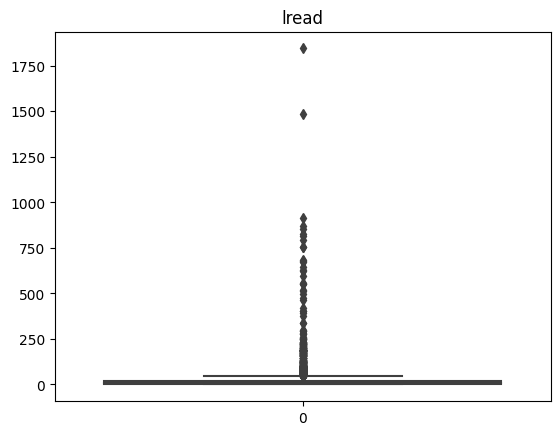

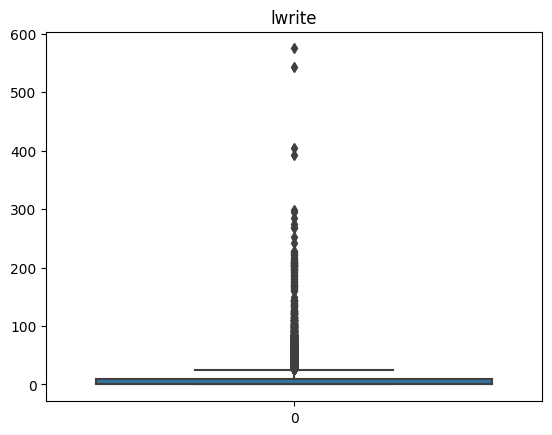

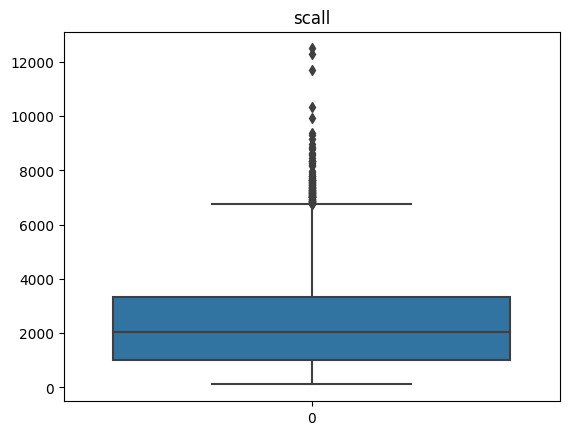

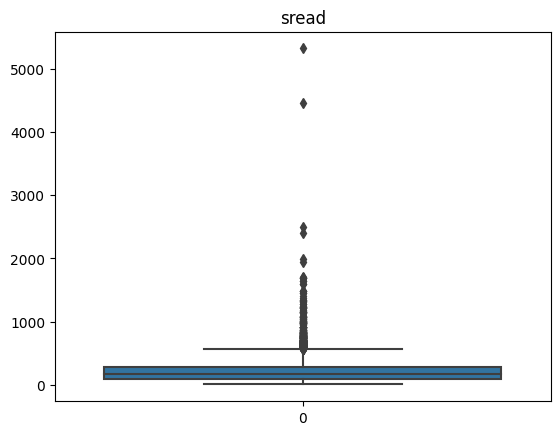

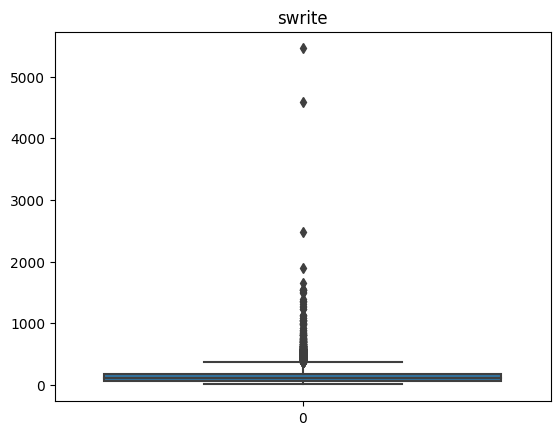

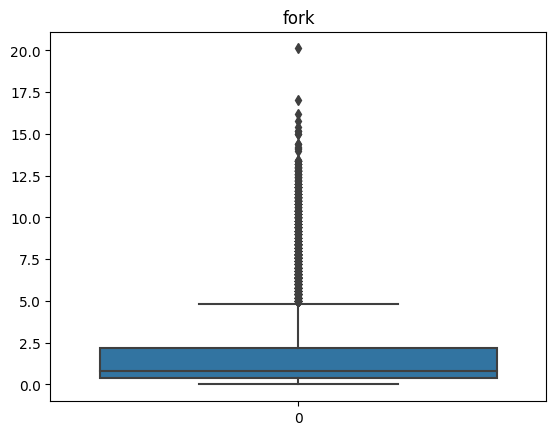

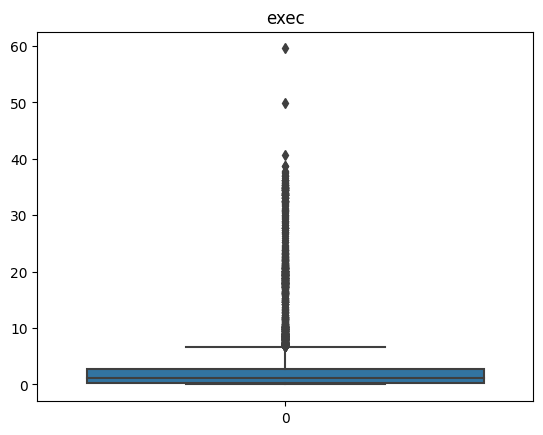

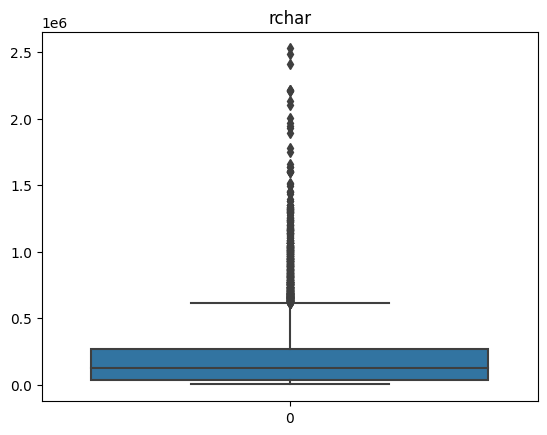

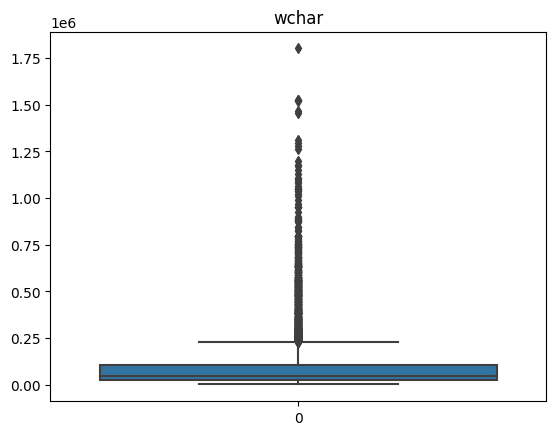

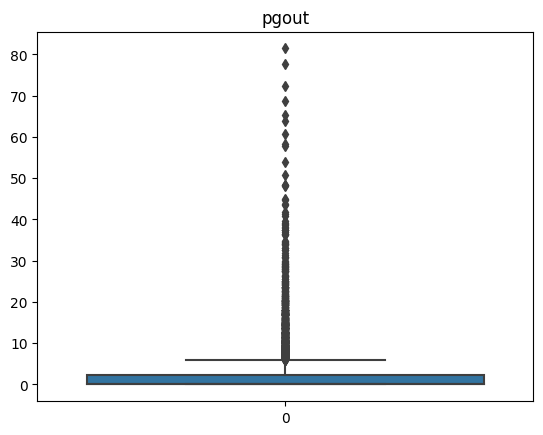

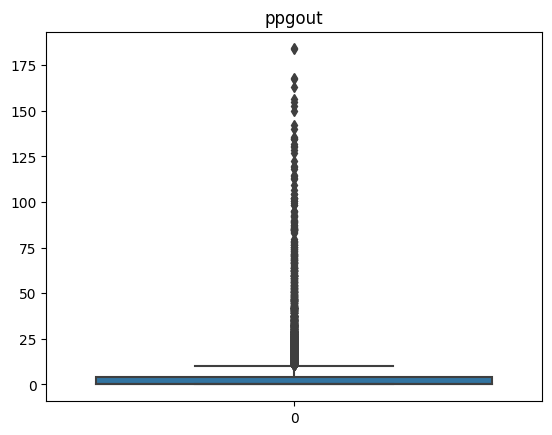

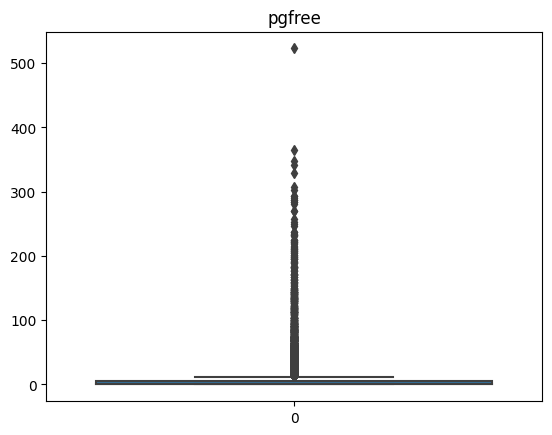

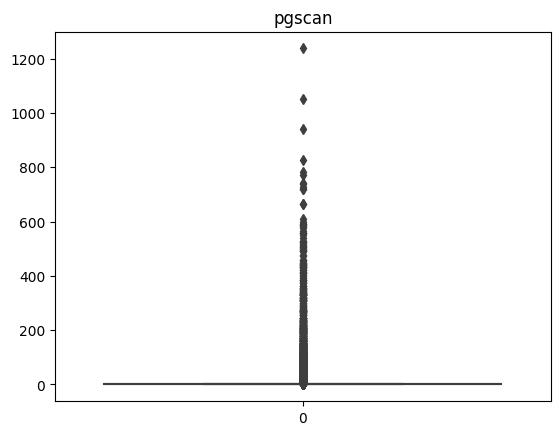

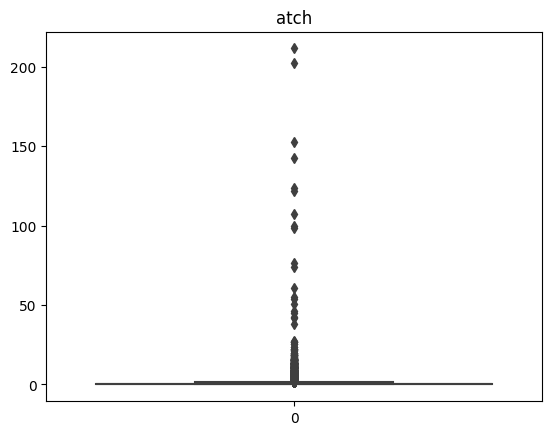

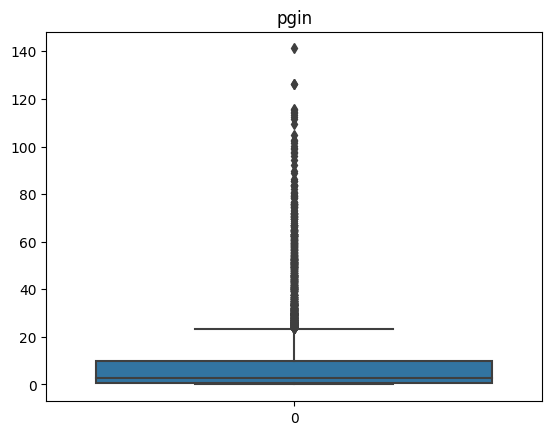

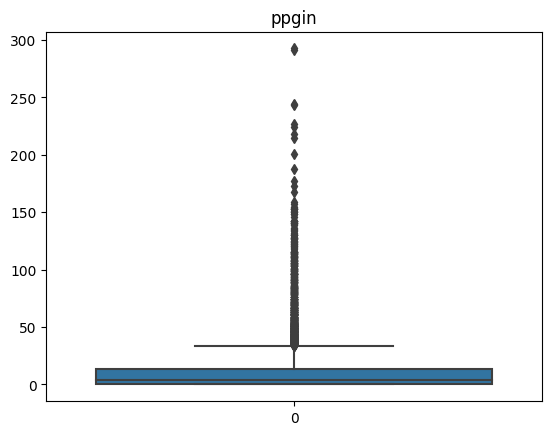

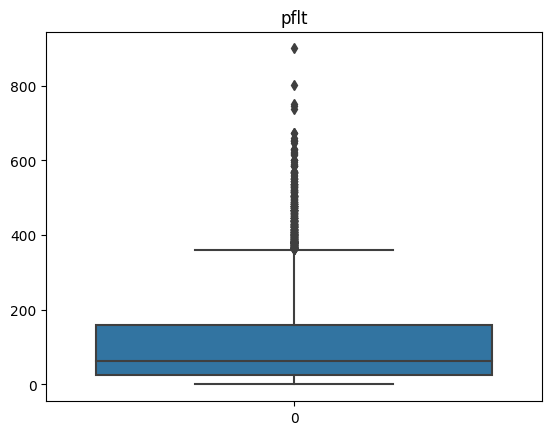

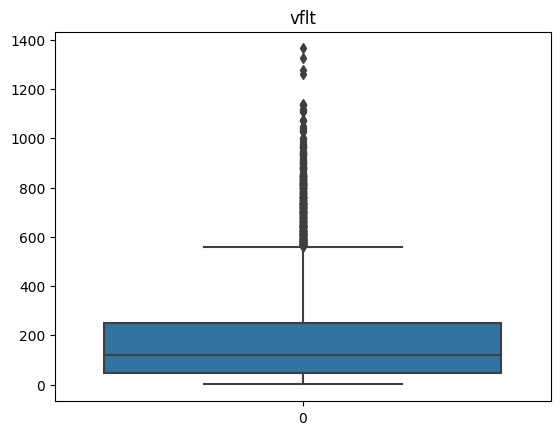

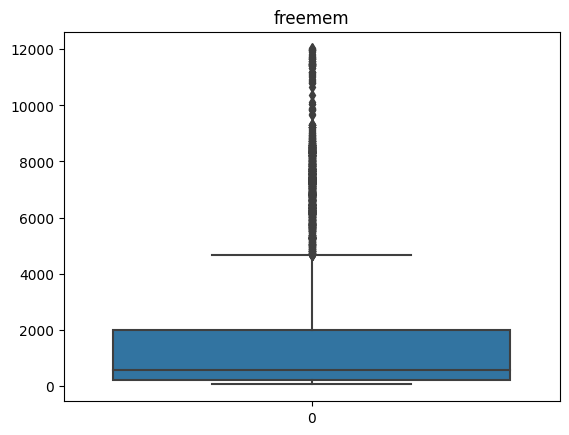

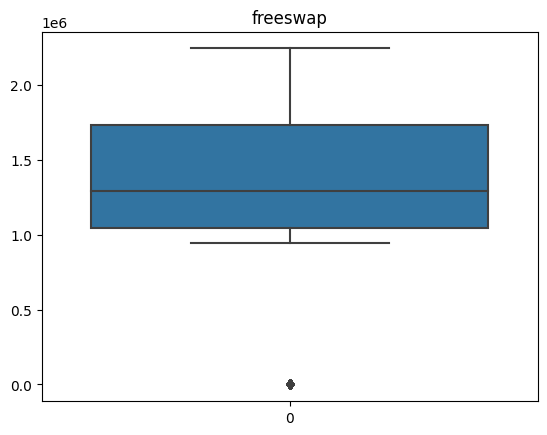

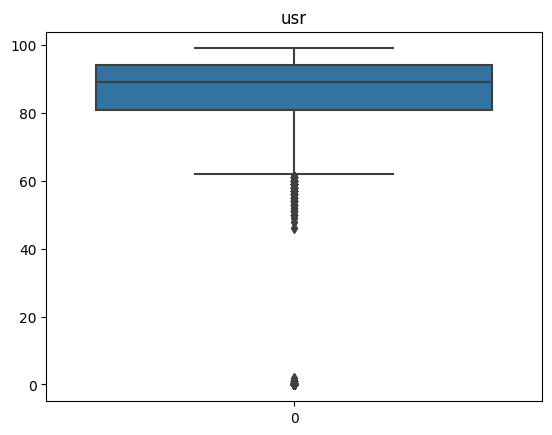

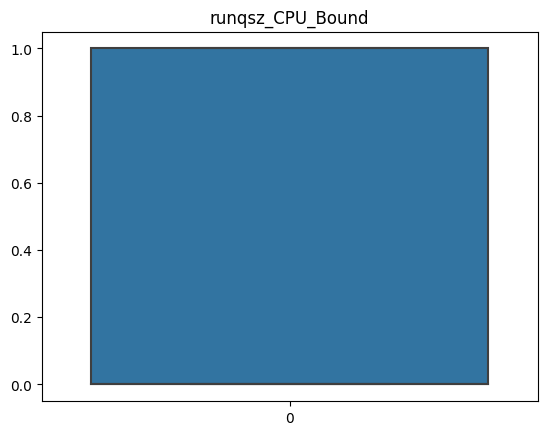

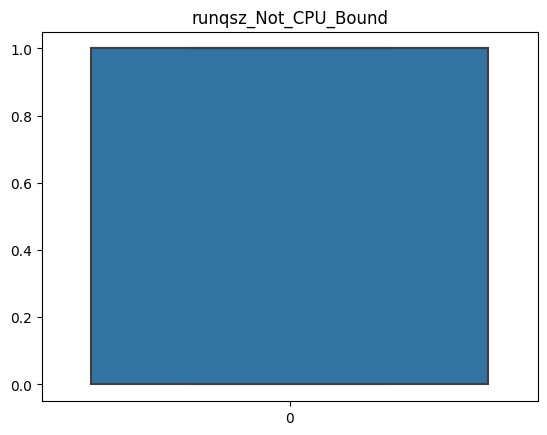

In [56]:
##
##

boxplot_creator(comp1)

In [57]:
##
## outlier removal using IQR

def remove_outliers_iqr(datadata):
    for column in datadata.columns:
        Q1 = datadata[column].quantile(0.25)
        Q3 = datadata[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        datadata[column] = np.where(datadata[column] < lower_bound, lower_bound, datadata[column])
        datadata[column] = np.where(datadata[column] > upper_bound, upper_bound, datadata[column])

    return datadata


##
## outlier remvoval using z-score


from scipy.stats import zscore

def remove_outliers_zscore(datadata, threshold=2):
    for column in datadata.columns:
        mean_value = datadata[column].mean()
        std_dev = datadata[column].std()

        lower_bound = mean_value - threshold * std_dev
        upper_bound = mean_value + threshold * std_dev

        datadata[column] = np.where(datadata[column] < lower_bound, lower_bound, datadata[column])
        datadata[column] = np.where(datadata[column] > upper_bound, upper_bound, datadata[column])

    return datadata

In [58]:
##
##

def compare_boxplots(original_data, iqr_data, zscore_data, figsize_per_row=(18, 4)):
    num_features = len(original_data.columns)
    fig, axes = plt.subplots(num_features, 3, figsize=(figsize_per_row[0], figsize_per_row[1] * num_features))

    for i, col in enumerate(original_data.columns):
        sns.boxplot(x=original_data[col], ax=axes[i, 0])
        axes[i, 0].set_title(f'Original Data: {col}')

        sns.boxplot(x=iqr_data[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'IQR-Filtered Data: {col}')

        sns.boxplot(x=zscore_data[col], ax=axes[i, 2])
        axes[i, 2].set_title(f'Z-Score-Filtered Data: {col}')

    plt.tight_layout()
    plt.show()






In [59]:
##
##

comp1_for_iqr = comp1.copy()
comp1_for_zscore = comp1.copy()

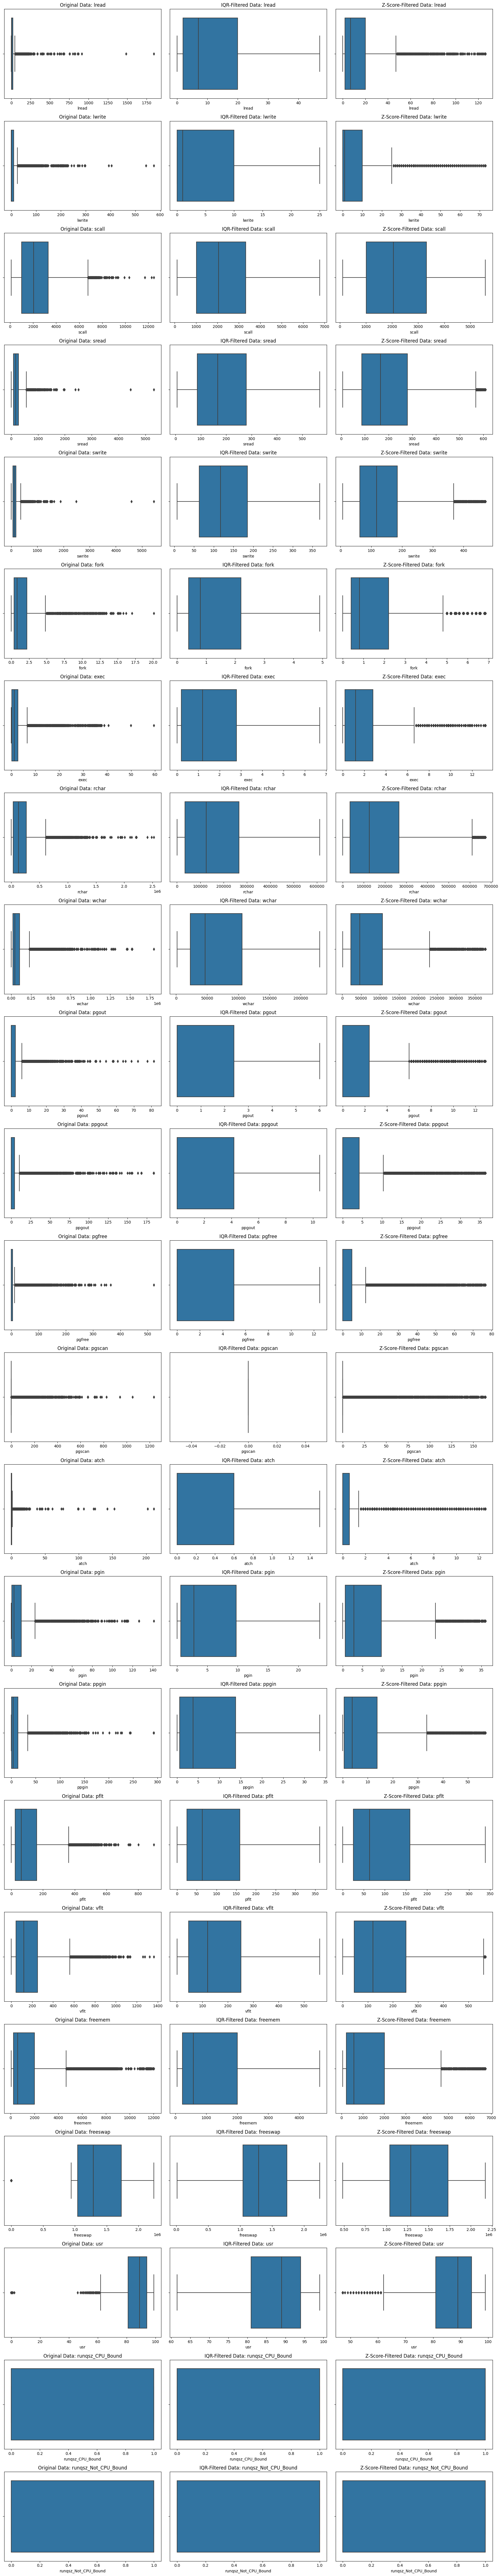

In [60]:
##
##

comp1_iqr = remove_outliers_iqr(comp1_for_iqr)
comp1_zscore = remove_outliers_zscore(comp1_for_zscore)

compare_boxplots(comp1, comp1_iqr, comp1_zscore)


In [61]:
##
## comp1_iqr zero values

columns_to_check2 = comp1_iqr.columns

zero_percentage2 = {col: (comp1_iqr[col] == 0).sum() / len(comp1_iqr) * 100 for col in columns_to_check if col in comp1_iqr.columns}

zero_percentage2


{'lread': 8.23974609375,
 'lwrite': 32.763671875,
 'scall': 0.0,
 'sread': 0.0,
 'swrite': 0.0,
 'fork': 0.25634765625,
 'exec': 0.25634765625,
 'rchar': 0.0,
 'wchar': 0.0,
 'pgout': 59.5458984375,
 'ppgout': 59.5458984375,
 'pgfree': 59.43603515625,
 'pgscan': 100.0,
 'atch': 55.84716796875,
 'pgin': 14.892578125,
 'ppgin': 14.892578125,
 'pflt': 0.03662109375,
 'vflt': 0.0,
 'freemem': 0.0,
 'freeswap': 0.0,
 'usr': 0.0}

In [62]:
##
## variance for comp1

## Calculate the variance for each feature in the original dataset
feature_variances = comp1.var()

feature_variances

lread                   2.846628e+03
lwrite                  8.935153e+02
scall                   2.668706e+06
sread                   3.959310e+04
swrite                  2.575350e+04
fork                    6.147888e+00
exec                    2.716970e+01
rchar                   5.685650e+10
wchar                   1.980450e+10
pgout                   2.816465e+01
ppgout                  2.314837e+02
pgfree                  1.047397e+03
pgscan                  5.061090e+03
atch                    3.258523e+01
pgin                    1.925150e+02
ppgin                   4.964571e+02
pflt                    1.309176e+04
vflt                    3.648123e+04
freemem                 6.160843e+06
freeswap                1.781004e+11
usr                     3.386301e+02
runqsz_CPU_Bound        2.492075e-01
runqsz_Not_CPU_Bound    2.492075e-01
dtype: float64

In [63]:
##
## lets scale the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Standardize the features
comp1_standardized = standard_scaler.fit_transform(comp1)
comp1_iqr_standardized = standard_scaler.fit_transform(comp1_iqr)
comp1_zscore_standardized = standard_scaler.fit_transform(comp1_zscore)


# Normalize the features
comp1_normalized = standard_scaler.fit_transform(comp1)
comp1_iqr_normalized = standard_scaler.fit_transform(comp1_iqr)
comp1_zscore_normalized = standard_scaler.fit_transform(comp1_zscore)


# Convert back to DataFrame for better readability
comp1_standardized = pd.DataFrame(comp1_standardized, columns = comp1.columns)
comp1_iqr_standardized = pd.DataFrame(comp1_iqr_standardized, columns = comp1.columns)
comp1_zscore_standardized = pd.DataFrame(comp1_zscore_standardized, columns = comp1.columns)

comp1_normalized = pd.DataFrame(comp1_normalized, columns = comp1.columns)
comp1_iqr_normalized = pd.DataFrame(comp1_iqr_normalized, columns = comp1.columns)
comp1_zscore_normalized = pd.DataFrame(comp1_zscore_normalized, columns = comp1.columns)



### part 3



We will first use the data as it is without any changes to the it. We are using data that is treeated for null values, only further treatment as such is the differentiating factor like zeroes and other stuff.

In [64]:
##
## before splitting the data lets encode the categorical features that we have here
## in this case we have only one feature 'runqsz'

## we will use get dummied to set one hot encoding

## setting get_dummies before outlier check
"""

comp1 = pd.get_dummies(comp1, columns = ['runqsz'])
comp1.info()

"""

"\n\ncomp1 = pd.get_dummies(comp1, columns = ['runqsz'])\ncomp1.info()\n\n"

In [65]:
##
##

comp1[['runqsz_CPU_Bound', 'runqsz_Not_CPU_Bound']].head()

,runqsz_CPU_Bound,runqsz_Not_CPU_Bound
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [66]:
##
## setting the data

comp1_X = comp1.drop(['usr'], axis = 1)
print(comp1_X)
comp1_y = comp1['usr'].copy()
print(comp1_y)

      lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40  125473.5  31950.0   
3         0       0    160     12      16   0.2  0.20  125473.5   8670.0   
4         5       1    330     39      38   0.4  0.40  125473.5  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ppgout  pgfree  pgscan  atch   pgin  ppgin    pflt    vflt  \
0      0.00 

In [67]:
##
## lets split the data using 70:30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


In [68]:
##
## linear regression using statsmodel OLS

import statsmodels.api as sm

## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)



In [69]:
##
## lets run the model

model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     480.9
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:43   Log-Likelihood:                -21859.
No. Observations:                5734   AIC:                         4.376e+04
Df Residuals:                    5712   BIC:                         4.391e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   31.3747 

In [70]:
##
##

## let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    0.000000
lread                    1.421712
lwrite                   1.367608
scall                    2.423422
sread                    7.377602
swrite                   5.757230
fork                    17.956816
exec                     3.047791
rchar                    2.015544
wchar                    1.570710
pgout                    5.427330
ppgout                  14.003918
pgfree                  18.043180
pgscan                   8.301819
atch                     1.093477
pgin                     7.202908
ppgin                    7.450748
pflt                    11.036670
vflt                    18.689843
freemem                  1.667234
freeswap                 1.763099
runqsz_CPU_Bound              inf
runqsz_Not_CPU_Bound          inf
dtype: float64



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [71]:
##
## Mean squared error for statsmodel using comp1

from sklearn.metrics import mean_squared_error

mse_sm = mean_squared_error(y_test, y_pred)
mse_sm


127.3430133193638

Comp1 using scikit learn

In [72]:
##
## comp1 using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


Mean Squared Error: 127.34301331936635
Coefficients: [ 0.00000000e+00 -1.86361278e-02 -1.66436691e-04  9.76596726e-04
  2.52812713e-03 -3.81660756e-03 -1.80157886e+00 -6.10919507e-02
 -4.05379195e-06 -1.03120881e-05 -2.51878252e-01  1.40014053e-01
 -9.36299355e-02  1.59504342e-02  2.98905857e-02  7.13046631e-02
 -4.68252770e-02 -3.94346545e-02  2.12977754e-02 -1.63444139e-03
  3.30146955e-05 -3.95509560e+00  3.95509560e+00]
Intercept: 47.06206677194266


0.6406031458101984

Let us try a dataset that has been tampered with IQR outlier treatment, only this is the change that has been done, nothing else.



Using comp1_iqr on statsmodel

In [73]:
##
##

## separete the independent and dependent features
comp1_X = comp1_iqr.drop(['usr'], axis = 1)
comp1_y = comp1_iqr['usr'].copy()

## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

21.128365582888872
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1093.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:43   Log-Likelihood:                -16686.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5713   BIC:                         3.355e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const        

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Comp1_iqr using scikit learn


In [74]:
##
## comp1_iqr using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 21.128365582877098
Coefficients: [ 0.00000000e+00 -6.32904206e-02  4.55863778e-02 -7.20169479e-04
  2.60019382e-03 -6.44894441e-03 -8.96232190e-02 -2.49432565e-01
 -4.98274441e-06 -5.19623243e-06 -4.97922374e-01 -6.74680826e-02
  1.45550040e-01  1.11022302e-16  5.88050242e-01  5.18292525e-02
 -8.45999388e-02 -3.23704583e-02 -6.20376240e-03 -4.68378479e-04
  9.22347162e-06 -8.62118165e-01  8.62118165e-01]
Intercept: 84.18727238510888


0.7765561781749315

comp1_iqr when applied cross-validation



In [75]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

CV scores: [0.78092091 0.79826273 0.77853612 0.80653933 0.78316652]
Average CV score: 0.7894851221608945
Mean Squared Error: 21.128365582877098
Coefficients: [ 0.00000000e+00 -6.32904206e-02  4.55863778e-02 -7.20169479e-04
  2.60019382e-03 -6.44894441e-03 -8.96232190e-02 -2.49432565e-01
 -4.98274441e-06 -5.19623243e-06 -4.97922374e-01 -6.74680826e-02
  1.45550040e-01  1.11022302e-16  5.88050242e-01  5.18292525e-02
 -8.45999388e-02 -3.23704583e-02 -6.20376240e-03 -4.68378479e-04
  9.22347162e-06 -8.62118165e-01  8.62118165e-01]
Intercept: 84.18727238510888


0.7765561781749315

Let us run a model that has been tampered with Z-Score outlier treatment


comp1_zscore using statsmodel

In [76]:
##
##

## separete the independent and dependent features
comp1_X = comp1_zscore.drop(['usr'], axis = 1)
comp1_y = comp1_zscore['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

47.02502060981424
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     537.8
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:44   Log-Likelihood:                -18978.
No. Observations:                5734   AIC:                         3.800e+04
Df Residuals:                    5712   BIC:                         3.815e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


comp1_zscore using scikit learn

In [77]:
##
## comp1_zscore using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 47.025020609817155
Coefficients: [ 0.00000000e+00 -4.12910301e-02  1.59826117e-02  1.59765987e-05
  5.92748518e-04 -8.66676939e-03 -6.96123663e-01 -4.10608891e-01
 -5.45990196e-06 -7.21760955e-06 -4.13137383e-01  1.61113612e-01
 -6.65560828e-02  1.30250191e-02  5.22973111e-02  5.83112991e-02
 -6.83338301e-02 -2.60564223e-02  4.82858517e-04 -5.59643180e-04
  1.32793037e-05 -1.78764009e+00  1.78764009e+00]
Intercept: 77.2749868030783


0.6479369720521624

Comp1_standardized using scikit learn


In [78]:
##
## comp1_standardized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp1_standardized.drop(['usr'], axis = 1)
comp1_y = comp1_standardized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.37609936033605007
Coefficients: [-5.40328971e-02 -2.70356796e-04  8.66967507e-02  2.73366872e-02
 -3.32837989e-02 -2.42746774e-01 -1.73046820e-02 -5.25277438e-02
 -7.88616378e-02 -7.26407090e-02  1.15762823e-01 -1.64667427e-01
  6.16640122e-02  9.27218411e-03  5.37634928e-02 -5.66967887e-02
 -2.45196492e-01  2.21057986e-01 -2.20458396e-01  7.57141353e-01
 -1.07293836e-01  1.07293836e-01]
Intercept: -0.0038081332173150093


0.6406031458101988

Comp1_iqr_standardized using statsmodel


In [79]:
##
##

## separete the independent and dependent features
comp1_X = comp1_iqr_standardized.drop(['usr'], axis = 1)
comp1_y = comp1_iqr_standardized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

0.22234931154929732
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1093.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:45   Log-Likelihood:                -3629.8
No. Observations:                5734   AIC:                             7302.
Df Residuals:                    5713   BIC:                             7441.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Comp1_iqr_standardized using scikit learn only


In [80]:
##
## comp1_iqr_standardized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp1_iqr_standardized.drop(['usr'], axis = 1)
comp1_y = comp1_iqr_standardized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.22234931154929732
Coefficients: [-9.84210982e-02  4.34510356e-02 -1.17688600e-01  3.91443149e-02
 -6.42618714e-02 -1.46288154e-02 -5.18959921e-02 -8.92368953e-02
 -3.79848879e-02 -1.12380852e-01 -2.79414963e-02  7.44032158e-02
  9.71445147e-17  3.39572334e-02  4.08549276e-02 -9.68564925e-02
 -3.37195699e-01 -1.03409162e-01 -7.71501769e-02  3.98117025e-01
 -4.41474667e-02  4.41474667e-02]
Intercept: -0.0023686182438358164


0.7765561781749319

comp1_iqr_standardization when applied cross_validation


In [81]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

CV scores: [0.78092091 0.79826273 0.77853612 0.80653933 0.78316652]
Average CV score: 0.7894851221609175
Mean Squared Error: 0.22234931154929732
Coefficients: [-9.84210982e-02  4.34510356e-02 -1.17688600e-01  3.91443149e-02
 -6.42618714e-02 -1.46288154e-02 -5.18959921e-02 -8.92368953e-02
 -3.79848879e-02 -1.12380852e-01 -2.79414963e-02  7.44032158e-02
  9.71445147e-17  3.39572334e-02  4.08549276e-02 -9.68564925e-02
 -3.37195699e-01 -1.03409162e-01 -7.71501769e-02  3.98117025e-01
 -4.41474667e-02  4.41474667e-02]
Intercept: -0.0023686182438358164


0.7765561781749319

Com1_zscore_standardized using scikit_learn


In [82]:
##
## comp1_zscore_standardized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp1_zscore_standardized.drop(['usr'], axis = 1)
comp1_y = comp1_zscore_standardized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.35752099090712836
Coefficients: [-0.08875617  0.0278299   0.00212036  0.00778474 -0.08230339 -0.12099649
 -0.11289408 -0.08697267 -0.06058716 -0.12447406  0.13502399 -0.11706886
  0.04596366  0.00988292  0.05020741 -0.09131981 -0.2238299   0.0068757
 -0.10560766  0.4332767  -0.07780731  0.07780731]
Intercept: -0.002016413902540888


0.6479369720521656

Comp1_normalized using scikit learn

In [83]:
##
## comp1_normalized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp1_normalized.drop(['usr'], axis = 1)
comp1_y = comp1_normalized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.37609936033605007
Coefficients: [-5.40328971e-02 -2.70356796e-04  8.66967507e-02  2.73366872e-02
 -3.32837989e-02 -2.42746774e-01 -1.73046820e-02 -5.25277438e-02
 -7.88616378e-02 -7.26407090e-02  1.15762823e-01 -1.64667427e-01
  6.16640122e-02  9.27218411e-03  5.37634928e-02 -5.66967887e-02
 -2.45196492e-01  2.21057986e-01 -2.20458396e-01  7.57141353e-01
 -1.07293836e-01  1.07293836e-01]
Intercept: -0.0038081332173150093


0.6406031458101988

comp1_iqr_normalzied using scikit learn

In [84]:
##
## comp1_iqr_normalized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp1_iqr_normalized.drop(['usr'], axis = 1)
comp1_y = comp1_iqr_normalized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.22234931154929732
Coefficients: [-9.84210982e-02  4.34510356e-02 -1.17688600e-01  3.91443149e-02
 -6.42618714e-02 -1.46288154e-02 -5.18959921e-02 -8.92368953e-02
 -3.79848879e-02 -1.12380852e-01 -2.79414963e-02  7.44032158e-02
  9.71445147e-17  3.39572334e-02  4.08549276e-02 -9.68564925e-02
 -3.37195699e-01 -1.03409162e-01 -7.71501769e-02  3.98117025e-01
 -4.41474667e-02  4.41474667e-02]
Intercept: -0.0023686182438358164


0.7765561781749319

comp1_iqr_normalized when applied cross_validation


In [85]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2



CV scores: [0.78092091 0.79826273 0.77853612 0.80653933 0.78316652]
Average CV score: 0.7894851221609175
Mean Squared Error: 0.22234931154929732
Coefficients: [-9.84210982e-02  4.34510356e-02 -1.17688600e-01  3.91443149e-02
 -6.42618714e-02 -1.46288154e-02 -5.18959921e-02 -8.92368953e-02
 -3.79848879e-02 -1.12380852e-01 -2.79414963e-02  7.44032158e-02
  9.71445147e-17  3.39572334e-02  4.08549276e-02 -9.68564925e-02
 -3.37195699e-01 -1.03409162e-01 -7.71501769e-02  3.98117025e-01
 -4.41474667e-02  4.41474667e-02]
Intercept: -0.0023686182438358164


0.7765561781749319

comp1_zscore_normalized using scikit learn

In [86]:
##
## comp1_zscore_normalized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp1_zscore_normalized.drop(['usr'], axis = 1)
comp1_y = comp1_zscore_normalized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.35752099090712836
Coefficients: [-0.08875617  0.0278299   0.00212036  0.00778474 -0.08230339 -0.12099649
 -0.11289408 -0.08697267 -0.06058716 -0.12447406  0.13502399 -0.11706886
  0.04596366  0.00988292  0.05020741 -0.09131981 -0.2238299   0.0068757
 -0.10560766  0.4332767  -0.07780731  0.07780731]
Intercept: -0.002016413902540888


0.6479369720521656

Lets try the same steps for comp2 - which has the features 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch' removed



In [87]:
##
##

comp2[['rchar', 'wchar']] = comp2[['rchar', 'wchar']].fillna(comp2[['rchar', 'wchar']].median())
comp2['rchar'].describe()

count    8.192000e+03
mean     1.964728e+05
std      2.384460e+05
min      2.780000e+02
25%      3.486050e+04
50%      1.254735e+05
75%      2.653948e+05
max      2.526649e+06
Name: rchar, dtype: float64

In [88]:
##
##

comp2.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,125473.5,31950.0,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,125473.5,8670.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,125473.5,12185.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [89]:

##
##


comp2 = pd.get_dummies(comp2, columns = ['runqsz'])


In [90]:
###
##

comp2_for_iqr = comp2.copy()
comp2_for_zscore = comp2.copy()

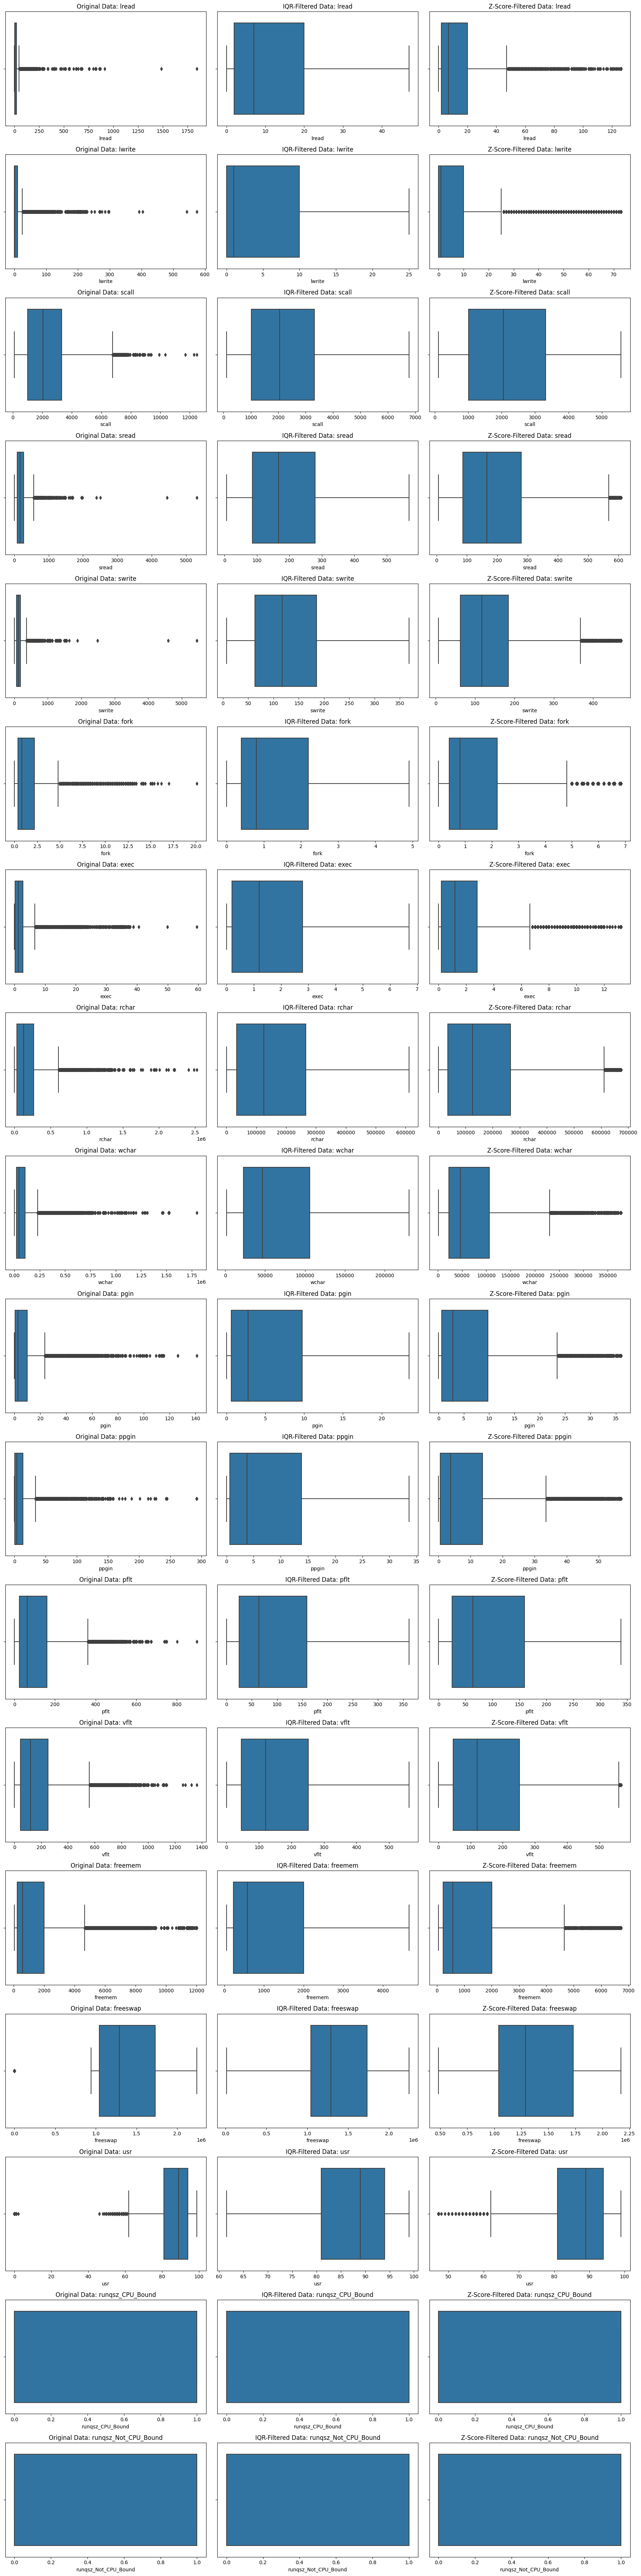

In [91]:
##
## boxplots for the same

comp2_iqr = remove_outliers_iqr(comp2_for_iqr)
comp2_zscore = remove_outliers_zscore(comp2_for_zscore)

compare_boxplots(comp2, comp2_iqr, comp2_zscore)

In [92]:
##
## lets scale the data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Standardize the features
comp2_standardized = standard_scaler.fit_transform(comp2)
comp2_iqr_standardized = standard_scaler.fit_transform(comp2_iqr)
comp2_zscore_standardized = standard_scaler.fit_transform(comp2_zscore)


# Normalize the features
comp2_normalized = standard_scaler.fit_transform(comp2)
comp2_iqr_normalized = standard_scaler.fit_transform(comp2_iqr)
comp2_zscore_normalized = standard_scaler.fit_transform(comp2_zscore)


# Convert back to DataFrame for better readability
comp2_standardized = pd.DataFrame(comp2_standardized, columns = comp2.columns)
comp2_iqr_standardized = pd.DataFrame(comp2_iqr_standardized, columns = comp2.columns)
comp2_zscore_standardized = pd.DataFrame(comp2_zscore_standardized, columns = comp2.columns)

comp2_normalized = pd.DataFrame(comp2_normalized, columns = comp2.columns)
comp2_iqr_normalized = pd.DataFrame(comp2_iqr_normalized, columns = comp2.columns)
comp2_zscore_normalized = pd.DataFrame(comp2_zscore_normalized, columns = comp2.columns)


Lets run comp2 for the data as it is, this only has the missing values treated and runqsz was done get_dummies

In [93]:

##
##

## separete the independent and dependent features
comp2_X = comp2.drop(['usr'], axis = 1)
comp2_y = comp2['usr'].copy()

## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp2_X, comp2_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


127.7260976941355
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     621.2
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:55   Log-Likelihood:                -21890.
No. Observations:                5734   AIC:                         4.381e+04
Df Residuals:                    5717   BIC:                         4.393e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


lets try comp2 that has been treated using IQR


comp2 as it is using scikit learn


In [94]:
##
## comp2 using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 127.72609769413621
Coefficients: [ 0.00000000e+00 -1.81783534e-02 -1.06268936e-04  9.91287296e-04
  3.13668289e-03 -4.34920389e-03 -1.57609159e+00 -5.51964046e-02
 -3.99121030e-06 -1.06066398e-05  6.91858080e-02 -6.28253915e-02
 -3.88283779e-02  1.71478867e-02 -1.56666473e-03  3.30534605e-05
 -3.90814826e+00  3.90814826e+00]
Intercept: 46.81688208859911


0.6395219768038056

comp2_iqr using statsmodel

In [95]:

##
##

## separete the independent and dependent features
comp2_X = comp2_iqr.drop(['usr'], axis = 1)
comp2_y = comp2_iqr['usr'].copy()

## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp2_X, comp2_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


21.30987495622497
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:55   Log-Likelihood:                -16732.
No. Observations:                5734   AIC:                         3.350e+04
Df Residuals:                    5717   BIC:                         3.361e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


comp2_iqr using scikit learn


In [96]:
##
## comp2_iqr using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 21.309874956232957
Coefficients: [ 0.00000000e+00 -6.35635689e-02  4.67689216e-02 -7.18737002e-04
  2.43090553e-03 -6.15852788e-03 -5.50085936e-02 -2.37878984e-01
 -4.81552794e-06 -5.96906649e-06  5.29751396e-02 -9.67222795e-02
 -3.31447378e-02 -6.30498596e-03 -3.84951434e-04  9.18828974e-06
 -8.13143383e-01  8.13143383e-01]
Intercept: 84.06681743929067


0.7746366189965077

comp2_iqr when cross validation applied

In [97]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


CV scores: [0.77750591 0.79654401 0.77612496 0.80307493 0.77999608]
Average CV score: 0.7866491771443884
Mean Squared Error: 21.309874956232957
Coefficients: [ 0.00000000e+00 -6.35635689e-02  4.67689216e-02 -7.18737002e-04
  2.43090553e-03 -6.15852788e-03 -5.50085936e-02 -2.37878984e-01
 -4.81552794e-06 -5.96906649e-06  5.29751396e-02 -9.67222795e-02
 -3.31447378e-02 -6.30498596e-03 -3.84951434e-04  9.18828974e-06
 -8.13143383e-01  8.13143383e-01]
Intercept: 84.06681743929067


0.7746366189965077

Lets try comp2 treated using zscore

In [98]:

##
##

## separete the independent and dependent features
comp2_X = comp2_zscore.drop(['usr'], axis = 1)
comp2_y = comp2_zscore['usr'].copy()

## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp2_X, comp2_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


47.23995854334135
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     694.2
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:55   Log-Likelihood:                -19011.
No. Observations:                5734   AIC:                         3.806e+04
Df Residuals:                    5717   BIC:                         3.817e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


comp2_zscore using scikit learn



In [99]:
##
## comp2_zscore using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 47.239958543335455
Coefficients: [ 0.00000000e+00 -4.08352429e-02  1.61099383e-02  2.60649554e-05
  4.20885547e-04 -8.51906201e-03 -5.98467591e-01 -4.07182127e-01
 -5.22254717e-06 -8.06684564e-06  6.05283815e-02 -8.00270819e-02
 -2.63040027e-02 -1.03051260e-03 -4.75408868e-04  1.33488541e-05
 -1.73025031e+00  1.73025031e+00]
Intercept: 76.89150332821976


0.6463277925406172

Comp2_standardized using scikit learn


In [100]:
##
## comp2_standardized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp2_standardized.drop(['usr'], axis = 1)
comp1_y = comp2_standardized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.377230775280225
Coefficients: [-5.27056431e-02 -1.72621367e-04  8.80008967e-02  3.39170123e-02
 -3.79284548e-02 -2.12364363e-01 -1.56347312e-02 -5.17168307e-02
 -8.11142200e-02  5.21658826e-02 -7.60699812e-02 -2.41426790e-01
  1.77984660e-01 -2.11316475e-01  7.58030369e-01 -1.06020248e-01
  1.06020248e-01]
Intercept: -0.0038153598473876873


0.6395219768038052

Comp2_zscore_standardized using scikit_learn


In [101]:
##
## comp2_zscore_standardized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp2_zscore_standardized.drop(['usr'], axis = 1)
comp1_y = comp2_zscore_standardized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.3591551172079483
Coefficients: [-0.08777644  0.0280516   0.00345925  0.00552761 -0.08090069 -0.10402243
 -0.11195191 -0.08319176 -0.06771595  0.05211637 -0.10694642 -0.22595667
 -0.01467406 -0.0897122   0.43554598 -0.07530941  0.07530941]
Intercept: -0.0023443030779014638


0.6463277925406183

Comp2_normalized using scikit learn

In [102]:
##
## comp2_normalized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp2_normalized.drop(['usr'], axis = 1)
comp1_y = comp2_normalized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.377230775280225
Coefficients: [-5.27056431e-02 -1.72621367e-04  8.80008967e-02  3.39170123e-02
 -3.79284548e-02 -2.12364363e-01 -1.56347312e-02 -5.17168307e-02
 -8.11142200e-02  5.21658826e-02 -7.60699812e-02 -2.41426790e-01
  1.77984660e-01 -2.11316475e-01  7.58030369e-01 -1.06020248e-01
  1.06020248e-01]
Intercept: -0.0038153598473876873


0.6395219768038052

comp2_iqr_normalzied using scikit learn

In [103]:
##
## comp2_iqr_normalized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp2_iqr_normalized.drop(['usr'], axis = 1)
comp1_y = comp2_iqr_normalized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.22425946801866445
Coefficients: [-0.09884586  0.04457819 -0.11745451  0.03659578 -0.06136795 -0.00897882
 -0.0494922  -0.08624218 -0.04363437  0.04175818 -0.11073508 -0.34526119
 -0.10509644 -0.06340827  0.39659845 -0.04163956  0.04163956]
Intercept: -0.0028337020391712435


0.7746366189965145

Comp2_iqr_normalization when applied cross_validation

In [104]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


CV scores: [0.77750591 0.79654401 0.77612496 0.80307493 0.77999608]
Average CV score: 0.7866491771444135
Mean Squared Error: 0.22425946801866445
Coefficients: [-0.09884586  0.04457819 -0.11745451  0.03659578 -0.06136795 -0.00897882
 -0.0494922  -0.08624218 -0.04363437  0.04175818 -0.11073508 -0.34526119
 -0.10509644 -0.06340827  0.39659845 -0.04163956  0.04163956]
Intercept: -0.0028337020391712435


0.7746366189965145

comp2_zscore_normalized using scikit learn

In [105]:
##
## comp2_zscore_normalized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp1_X = comp2_zscore_normalized.drop(['usr'], axis = 1)
comp1_y = comp2_zscore_normalized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.3591551172079483
Coefficients: [-0.08777644  0.0280516   0.00345925  0.00552761 -0.08090069 -0.10402243
 -0.11195191 -0.08319176 -0.06771595  0.05211637 -0.10694642 -0.22595667
 -0.01467406 -0.0897122   0.43554598 -0.07530941  0.07530941]
Intercept: -0.0023443030779014638


0.6463277925406183

## model - 1 refered in the report is here

Comp2_iqr_standardized using statsmodel

In [106]:
##
##

## separete the independent and dependent features
comp2_X = comp2_iqr_standardized.drop(['usr'], axis = 1)
comp2_y = comp2_iqr_standardized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp2_X, comp2_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)


## printing mse
print(mean_squared_error(y_test, y_pred))


## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


0.2242594680186644
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:56   Log-Likelihood:                -3675.8
No. Observations:                5734   AIC:                             7386.
Df Residuals:                    5717   BIC:                             7499.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const        

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [107]:
##
## Performance on the training part

y_pred_train = model.predict(X_train)
print(mean_squared_error(y_train, y_pred_train))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

0.21102719773157652
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1339.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:56   Log-Likelihood:                -3675.8
No. Observations:                5734   AIC:                             7386.
Df Residuals:                    5717   BIC:                             7499.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Comp2_iqr_standardized using scikit learn only


In [108]:
##
## comp2_iqr_standardized using scikit learn



##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


## separete the independent and dependent features
comp2_X = comp2_iqr_standardized.drop(['usr'], axis = 1)
comp2_y = comp2_iqr_standardized['usr'].copy()


## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp2_X, comp2_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

# Number of samples and features
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.22425946801866445
Coefficients: [-0.09884586  0.04457819 -0.11745451  0.03659578 -0.06136795 -0.00897882
 -0.0494922  -0.08624218 -0.04363437  0.04175818 -0.11073508 -0.34526119
 -0.10509644 -0.06340827  0.39659845 -0.04163956  0.04163956]
Intercept: -0.0028337020391712435
0.7746366189965145
Adjusted R-squared: 0.7730664642928017


In [109]:
##
## now on the training part

## Making predictions on the test data
y_pred_train = model.predict(X_train)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print(r2)


# Number of samples and features
n = X_train.shape[0]
k = X_train.shape[1]

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.21102719773157652
Coefficients: [-0.09884586  0.04457819 -0.11745451  0.03659578 -0.06136795 -0.00897882
 -0.0494922  -0.08624218 -0.04363437  0.04175818 -0.11073508 -0.34526119
 -0.10509644 -0.06340827  0.39659845 -0.04163956  0.04163956]
Intercept: -0.0028337020391712435
0.7894053524512561
Adjusted R-squared: 0.7887790212741517


comp2_iqr_standardization when applied cross_validation

In [110]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


CV scores: [0.77750591 0.79654401 0.77612496 0.80307493 0.77999608]
Average CV score: 0.7866491771444135
Mean Squared Error: 0.22425946801866445
Coefficients: [-0.09884586  0.04457819 -0.11745451  0.03659578 -0.06136795 -0.00897882
 -0.0494922  -0.08624218 -0.04363437  0.04175818 -0.11073508 -0.34526119
 -0.10509644 -0.06340827  0.39659845 -0.04163956  0.04163956]
Intercept: -0.0028337020391712435


0.7746366189965145

In [111]:
##
## when we remove the insignificant values

## separete the independent and dependent features
comp1_X = comp2_iqr_standardized.drop(['usr', 'scall', 'sread', 'vflt'], axis = 1)
comp1_y = comp2_iqr_standardized['usr'].copy()

## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp1_X, comp1_y, test_size = 0.3, random_state = 42)


## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.22860050747717856
Coefficients: [-0.11476877  0.05402928 -0.11589205 -0.02420885 -0.08289872 -0.0846375
 -0.03874817  0.02413619 -0.10778485 -0.40310566 -0.0529636   0.40437967
 -0.0454079   0.0454079 ]
Intercept: -0.004272468241456223


0.7702742108534663

In [112]:
##
## now on the training part

## Making predictions on the test data
y_pred_train = model.predict(X_train)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
r2

Mean Squared Error: 0.21673832752535685
Coefficients: [-0.11476877  0.05402928 -0.11589205 -0.02420885 -0.08289872 -0.0846375
 -0.03874817  0.02413619 -0.10778485 -0.40310566 -0.0529636   0.40437967
 -0.0454079   0.0454079 ]
Intercept: -0.004272468241456223


0.7837059289695675

In [113]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


CV scores: [0.77161781 0.79038051 0.76929818 0.79936839 0.7746708 ]
Average CV score: 0.7810671409004952
Mean Squared Error: 0.22860050747717856
Coefficients: [-0.11476877  0.05402928 -0.11589205 -0.02420885 -0.08289872 -0.0846375
 -0.03874817  0.02413619 -0.10778485 -0.40310566 -0.0529636   0.40437967
 -0.0454079   0.0454079 ]
Intercept: -0.004272468241456223


0.7702742108534663

## part 4



Lets use comp2_iqr and engineer some features to improve the performance

In [114]:
##
##

comp2_iqr.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_CPU_Bound,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,95.0,1.0,0.0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,97.0,0.0,1.0
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.0,6.0,9.4,150.20,220.20,702.000,1021237.0,87.0,0.0,1.0
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,98.0,0.0,1.0
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.0,1.0,1.2,37.80,47.60,633.000,1760253.0,90.0,0.0,1.0


In [115]:
##
##

comp2_iqr_nousr = pd.DataFrame(comp2_iqr.drop('usr', axis = 1))
comp3_iqr = comp2_iqr_nousr ** 2
comp3_iqr.columns = [f"{cols}_squared" for cols in comp2_iqr_nousr.columns]
comp3_iqr_finale = pd.concat([comp2_iqr, comp3_iqr], axis = 1)

comp2_iqr_standardized_nousr = pd.DataFrame(comp2_iqr_standardized.drop('usr', axis = 1))
comp3_iqr_standardized = comp2_iqr_standardized_nousr ** 2
comp3_iqr_standardized.columns = [f"{cols}_squared" for cols in comp2_iqr_standardized_nousr.columns]
comp3_iqr_stand_finale = pd.concat([comp2_iqr_standardized, comp3_iqr_standardized], axis = 1)

comp2_iqr_normalized_nousr = pd.DataFrame(comp2_iqr_normalized.drop('usr', axis = 1))
comp3_iqr_normalized = comp2_iqr_normalized_nousr ** 2
comp3_iqr_normalized.columns = [f"{cols}_squared" for cols in comp2_iqr_normalized_nousr.columns]
comp3_iqr_norm_finale = pd.concat([comp2_iqr_normalized, comp3_iqr], axis = 1)

In [116]:
##
##
comp3_iqr_finale.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_CPU_Bound,runqsz_Not_CPU_Bound,lread_squared,lwrite_squared,scall_squared,sread_squared,swrite_squared,fork_squared,exec_squared,rchar_squared,wchar_squared,pgin_squared,ppgin_squared,pflt_squared,vflt_squared,freemem_squared,freeswap_squared,runqsz_CPU_Bound_squared,runqsz_Not_CPU_Bound_squared
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,95.0,1.0,0.0,1.0,0.0,4609609.0,6241.0,4624.0,0.04,0.04,1.654130e+09,2.915460e+09,2.56,6.76,256.0000,696.9600,2.170745e+07,2.996174e+12,1.0,0.0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,97.0,0.0,1.0,0.0,0.0,28900.0,324.0,441.0,0.04,0.04,2.007040e+05,7.030822e+07,0.00,0.00,244.2969,283.2489,2.170745e+07,3.493168e+12,0.0,1.0
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.0,6.0,9.4,150.20,220.20,702.000,1021237.0,87.0,0.0,1.0,225.0,9.0,4674244.0,25281.0,14161.0,4.00,5.76,1.574360e+10,1.020802e+09,36.00,88.36,22560.0400,48488.0400,4.928040e+05,1.042925e+12,0.0,1.0
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,98.0,0.0,1.0,0.0,0.0,25600.0,144.0,256.0,0.04,0.04,1.574360e+10,7.516890e+07,0.04,0.04,243.3600,282.2400,2.170745e+07,3.473393e+12,0.0,1.0
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.0,1.0,1.2,37.80,47.60,633.000,1760253.0,90.0,0.0,1.0,25.0,1.0,108900.0,1521.0,1444.0,0.16,0.16,1.574360e+10,1.484742e+08,1.00,1.44,1428.8400,2265.7600,4.006890e+05,3.098491e+12,0.0,1.0


In [117]:
##
##

comp3_iqr_stand_finale.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_CPU_Bound,runqsz_Not_CPU_Bound,lread_squared,lwrite_squared,scall_squared,sread_squared,swrite_squared,fork_squared,exec_squared,rchar_squared,wchar_squared,pgin_squared,ppgin_squared,pflt_squared,vflt_squared,freemem_squared,freeswap_squared,runqsz_CPU_Bound_squared,runqsz_Not_CPU_Bound_squared
0,-0.819513,-0.716521,-0.092583,-0.823008,-0.720331,-0.853341,-0.853740,-0.791696,-0.303831,-0.622761,-0.586048,-0.882744,-0.918365,2.037473,0.956433,0.898009,1.059118,-1.059118,0.671602,0.513403,0.008572,0.677342,0.518876,0.728192,0.728872,0.626782,0.092313,0.387831,0.343452,0.779236,0.843394,4.151298,0.914765,1.12173,1.12173
1,-0.885482,-0.716521,-1.333640,-1.238681,-1.204189,-0.853341,-0.853740,-1.022096,-0.943894,-0.830987,-0.819018,-0.886387,-0.977262,2.037473,1.284547,1.103180,-0.944182,0.944182,0.784078,0.513403,1.778596,1.534330,1.450071,0.728192,0.728872,1.044681,0.890935,0.690539,0.670790,0.785683,0.955041,4.151298,1.650061,0.89148,0.89148
2,0.104042,-0.393641,-0.083166,-0.277863,-0.195293,0.277935,0.231003,-0.305940,-0.613197,-0.050138,0.023258,0.438869,0.274345,-0.427003,-0.730310,0.077327,-0.944182,0.944182,0.010825,0.154954,0.006917,0.077208,0.038139,0.077248,0.053363,0.093599,0.376010,0.002514,0.000541,0.192606,0.075265,0.182332,0.533352,0.89148,0.89148
3,-0.885482,-0.716521,-1.339918,-1.279567,-1.255663,-0.853341,-0.853740,-0.305940,-0.939894,-0.804959,-0.801097,-0.886683,-0.977446,2.037473,1.271955,1.205765,-0.944182,0.944182,0.784078,0.513403,1.795379,1.637291,1.576690,0.728192,0.728872,0.093599,0.883401,0.647958,0.641756,0.786206,0.955402,4.151298,1.617870,0.89148,0.89148
4,-0.555640,-0.608895,-1.233200,-1.095580,-1.029176,-0.727644,-0.755127,-0.305940,-0.890567,-0.700845,-0.711493,-0.668055,-0.787893,-0.469976,1.026087,0.385083,-0.944182,0.944182,0.308736,0.370753,1.520783,1.200296,1.059204,0.529466,0.570217,0.093599,0.793109,0.491184,0.506222,0.446298,0.620775,0.220878,1.052854,0.89148,0.89148


In [118]:
##
##

comp3_iqr_norm_finale.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_CPU_Bound,runqsz_Not_CPU_Bound,lread_squared,lwrite_squared,scall_squared,sread_squared,swrite_squared,fork_squared,exec_squared,rchar_squared,wchar_squared,pgin_squared,ppgin_squared,pflt_squared,vflt_squared,freemem_squared,freeswap_squared,runqsz_CPU_Bound_squared,runqsz_Not_CPU_Bound_squared
0,-0.819513,-0.716521,-0.092583,-0.823008,-0.720331,-0.853341,-0.853740,-0.791696,-0.303831,-0.622761,-0.586048,-0.882744,-0.918365,2.037473,0.956433,0.898009,1.059118,-1.059118,1.0,0.0,4609609.0,6241.0,4624.0,0.04,0.04,1.654130e+09,2.915460e+09,2.56,6.76,256.0000,696.9600,2.170745e+07,2.996174e+12,1.0,0.0
1,-0.885482,-0.716521,-1.333640,-1.238681,-1.204189,-0.853341,-0.853740,-1.022096,-0.943894,-0.830987,-0.819018,-0.886387,-0.977262,2.037473,1.284547,1.103180,-0.944182,0.944182,0.0,0.0,28900.0,324.0,441.0,0.04,0.04,2.007040e+05,7.030822e+07,0.00,0.00,244.2969,283.2489,2.170745e+07,3.493168e+12,0.0,1.0
2,0.104042,-0.393641,-0.083166,-0.277863,-0.195293,0.277935,0.231003,-0.305940,-0.613197,-0.050138,0.023258,0.438869,0.274345,-0.427003,-0.730310,0.077327,-0.944182,0.944182,225.0,9.0,4674244.0,25281.0,14161.0,4.00,5.76,1.574360e+10,1.020802e+09,36.00,88.36,22560.0400,48488.0400,4.928040e+05,1.042925e+12,0.0,1.0
3,-0.885482,-0.716521,-1.339918,-1.279567,-1.255663,-0.853341,-0.853740,-0.305940,-0.939894,-0.804959,-0.801097,-0.886683,-0.977446,2.037473,1.271955,1.205765,-0.944182,0.944182,0.0,0.0,25600.0,144.0,256.0,0.04,0.04,1.574360e+10,7.516890e+07,0.04,0.04,243.3600,282.2400,2.170745e+07,3.473393e+12,0.0,1.0
4,-0.555640,-0.608895,-1.233200,-1.095580,-1.029176,-0.727644,-0.755127,-0.305940,-0.890567,-0.700845,-0.711493,-0.668055,-0.787893,-0.469976,1.026087,0.385083,-0.944182,0.944182,25.0,1.0,108900.0,1521.0,1444.0,0.16,0.16,1.574360e+10,1.484742e+08,1.00,1.44,1428.8400,2265.7600,4.006890e+05,3.098491e+12,0.0,1.0


lets try the above engineered features and see the performance

comp3_iqr_finale using statsmodel

In [119]:

##
##

## separete the independent and dependent features
comp3_X = comp3_iqr_finale.drop(['usr'], axis = 1)
comp3_y = comp3_iqr_finale['usr'].copy()

## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp3_X, comp3_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


9.847341769373198
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1716.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:57   Log-Likelihood:                -14505.
No. Observations:                5734   AIC:                         2.907e+04
Df Residuals:                    5702   BIC:                         2.929e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF values: 

const                           0.000000e+00
lread                           4.026589e+01
lwrite                          4.422234e+01
scall                           2.841621e+01
sread                           5.393684e+01
swrite                          5.811144e+01
fork                            1.000469e+02
exec                            3.098740e+01
rchar                           1.754578e+01
wchar                           2.278112e+01
pgin                            1.485309e+02
ppgin                           1.489563e+02
pflt                            7.932526e+01
vflt                            7.127493e+01
freemem                         2.565455e+01
freeswap                        1.810489e+01
runqsz_CPU_Bound                3.215054e+10
runqsz_Not_CPU_Bound            1.489076e+10
lread_squared                   2.649196e+01
lwrite_squared                  3.713233e+01
scall_squared                   1.917161e+01
sread_squared                   3.675813e

comp3_iqr_finale using scikit_learn



In [120]:
##
## comp3_iqr_finale using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 9.847279848771958
Coefficients: [-6.02191118e-07 -3.63467746e-02  2.37298447e-02 -1.22506488e-03
  3.13978926e-03 -8.09187952e-03 -6.07660656e-01  3.53593406e-01
 -2.67613141e-06 -9.70595996e-06 -1.36838458e-01 -3.61257791e-02
 -1.90850217e-02 -3.26216342e-03 -6.66025578e-07  3.80338717e-05
 -2.48174225e-02  2.48174225e-02 -5.19140100e-04  1.08619469e-03
 -4.92172408e-08 -2.86354209e-06  1.96564245e-06  1.49478985e-01
 -1.08531157e-01 -1.19033242e-12  1.79180689e-11  2.61309383e-03
 -5.36746592e-04 -1.45485423e-05 -1.82590095e-05  1.26668191e-07
 -1.39096082e-11 -2.48174225e-02  2.48174225e-02]
Intercept: 72.81717054092475


0.8958597230173937

cross validation for comp3_iqr_finale

In [121]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


CV scores: [0.89180409 0.91093039 0.89443812 0.90663276 0.90273542]
Average CV score: 0.9013081560593555
Mean Squared Error: 9.847279848771958
Coefficients: [-6.02191118e-07 -3.63467746e-02  2.37298447e-02 -1.22506488e-03
  3.13978926e-03 -8.09187952e-03 -6.07660656e-01  3.53593406e-01
 -2.67613141e-06 -9.70595996e-06 -1.36838458e-01 -3.61257791e-02
 -1.90850217e-02 -3.26216342e-03 -6.66025578e-07  3.80338717e-05
 -2.48174225e-02  2.48174225e-02 -5.19140100e-04  1.08619469e-03
 -4.92172408e-08 -2.86354209e-06  1.96564245e-06  1.49478985e-01
 -1.08531157e-01 -1.19033242e-12  1.79180689e-11  2.61309383e-03
 -5.36746592e-04 -1.45485423e-05 -1.82590095e-05  1.26668191e-07
 -1.39096082e-11 -2.48174225e-02  2.48174225e-02]
Intercept: 72.81717054092475


0.8958597230173937

comp3_iqr_norm_finale using statsmodel

In [122]:

##
##

## separete the independent and dependent features
comp3_X = comp3_iqr_norm_finale.drop(['usr'], axis = 1)
comp3_y = comp3_iqr_norm_finale['usr'].copy()

## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp3_X, comp3_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


0.10362816733466997
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1716.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:58   Log-Likelihood:                -1447.9
No. Observations:                5734   AIC:                             2960.
Df Residuals:                    5702   BIC:                             3173.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF values: 

const                           0.000000e+00
lread                           4.026559e+01
lwrite                          4.422204e+01
scall                           2.841619e+01
sread                           5.393684e+01
swrite                          5.811127e+01
fork                            1.000469e+02
exec                            3.098740e+01
rchar                           1.754578e+01
wchar                           2.278112e+01
pgin                            1.485309e+02
ppgin                           1.489554e+02
pflt                            7.932522e+01
vflt                            7.127492e+01
freemem                         2.565455e+01
freeswap                        1.810489e+01
runqsz_CPU_Bound                1.593752e+09
runqsz_Not_CPU_Bound            1.593752e+09
lread_squared                   2.649147e+01
lwrite_squared                  3.713229e+01
scall_squared                   1.917160e+01
sread_squared                   3.675813e

comp3_iqr_norm_finale using scikit_learn



In [123]:
##
## comp3_iqr_norm_finale using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

Mean Squared Error: 0.10361282869703083
Coefficients: [ 8.34155164e-06 -5.59511309e-02  2.33104451e-02 -1.99859836e-01
  4.78532554e-02 -8.14973159e-02 -9.89109158e-02  7.36496952e-02
 -4.91656305e-02 -7.05256722e-02 -1.07783572e-01 -4.11328019e-02
 -1.98281405e-01 -5.51193090e-02  5.44931933e-04  1.64228012e+00
 -2.15469787e-03  2.15469787e-03 -5.37596216e-05  1.07928152e-04
 -5.07207639e-09 -2.98993570e-07  2.16528157e-07  1.54380918e-02
 -1.11567360e-02 -1.11499595e-13  1.82355428e-12  2.67297818e-04
 -5.51523612e-05 -1.51129842e-06 -1.87329191e-06  1.29123221e-08
 -1.42750096e-12 -1.07557434e-03  1.07557434e-03]
Intercept: 2.894963099182438


0.8958771391156852

cross validation for comp3_iqr_norm_finale

In [124]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


CV scores: [0.89180508 0.91090686 0.89443397 0.90663767 0.90273114]
Average CV score: 0.9013029453695289
Mean Squared Error: 0.10361282869703083
Coefficients: [ 8.34155164e-06 -5.59511309e-02  2.33104451e-02 -1.99859836e-01
  4.78532554e-02 -8.14973159e-02 -9.89109158e-02  7.36496952e-02
 -4.91656305e-02 -7.05256722e-02 -1.07783572e-01 -4.11328019e-02
 -1.98281405e-01 -5.51193090e-02  5.44931933e-04  1.64228012e+00
 -2.15469787e-03  2.15469787e-03 -5.37596216e-05  1.07928152e-04
 -5.07207639e-09 -2.98993570e-07  2.16528157e-07  1.54380918e-02
 -1.11567360e-02 -1.11499595e-13  1.82355428e-12  2.67297818e-04
 -5.51523612e-05 -1.51129842e-06 -1.87329191e-06  1.29123221e-08
 -1.42750096e-12 -1.07557434e-03  1.07557434e-03]
Intercept: 2.894963099182438


0.8958771391156852

## model - 2 is here, as seen in the business report

comp3_iqr_stand_finale using statsmodel

In [125]:

##
##

## separete the independent and dependent features
comp3_X = comp3_iqr_stand_finale.drop(['usr'], axis = 1)
comp3_y = comp3_iqr_stand_finale['usr'].copy()

## Split the data for test and train
X_train, X_test, y_train, y_test = train_test_split(comp3_X, comp3_y, test_size = 0.3, random_state = 42)


## lets instantiate the model
import statsmodels.api as sm
## This adds the constant term beta0 to the Simple Linear Regression
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)


## run and print the model summaries
model = sm.OLS(y_train,X_train).fit()
y_pred = model.predict(X_test)

## printing mse
print(mean_squared_error(y_test, y_pred))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


0.10363016208295187
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1716.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:59   Log-Likelihood:                -1447.9
No. Observations:                5734   AIC:                             2960.
Df Residuals:                    5702   BIC:                             3173.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF values: 

const                            0.000000
lread                           14.058210
lwrite                          14.198030
scall                            6.210431
sread                           13.085030
swrite                          12.328813
fork                            31.894543
exec                             9.345995
rchar                            4.792793
wchar                            4.609462
pgin                            54.249747
ppgin                           53.747650
pflt                            25.385261
vflt                            23.109637
freemem                          5.953115
freeswap                         3.740542
runqsz_CPU_Bound                      inf
runqsz_Not_CPU_Bound                  inf
lread_squared                    5.856261
lwrite_squared                   9.073080
scall_squared                    2.595348
sread_squared                    5.376315
swrite_squared                   5.610442
fork_squared        

In [126]:
##
## Performance on the training part

y_pred_train = model.predict(X_train)
print(mean_squared_error(y_train, y_pred_train))

## printing summary
print(model.summary())


## Lets check the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

0.09701712444779789
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1716.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:19:59   Log-Likelihood:                -1447.9
No. Observations:                5734   AIC:                             2960.
Df Residuals:                    5702   BIC:                             3173.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF values: 

const                            0.000000
lread                           14.058210
lwrite                          14.198030
scall                            6.210431
sread                           13.085030
swrite                          12.328813
fork                            31.894543
exec                             9.345995
rchar                            4.792793
wchar                            4.609462
pgin                            54.249747
ppgin                           53.747650
pflt                            25.385261
vflt                            23.109637
freemem                          5.953115
freeswap                         3.740542
runqsz_CPU_Bound                      inf
runqsz_Not_CPU_Bound                  inf
lread_squared                    5.856261
lwrite_squared                   9.073080
scall_squared                    2.595348
sread_squared                    5.376315
swrite_squared                   5.610442
fork_squared        

comp3_iqr_stand_finale using scikit_learn



In [127]:
##
## comp3_iqr_stand_finale using scikit learn


##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Instantiating the Linear Regression model
model = LinearRegression()

## Fitting the model to the training data
model.fit(X_train, y_train)

## Making predictions on the test data
y_pred = model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

# Number of samples and features
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.10363016208295178
Coefficients: [ 2.37870725e-20 -7.81943817e-02  3.64035353e-02 -2.37106497e-01
  3.00433717e-02 -7.52283110e-02 -2.31703165e-02 -1.36611862e-02
 -5.55542224e-02 -5.11349140e-02 -8.15596654e-02 -5.25932450e-02
 -2.30822458e-01 -1.61279719e-01  5.77946752e-02  4.64218098e-02
 -2.50856541e-03  2.50856541e-03 -1.22377065e-02  9.61950894e-03
 -1.28124274e-02 -6.32621828e-03  1.90260514e-03  3.88215086e-02
 -4.57963415e-02 -3.72168645e-03  9.33364397e-03  1.58274076e-02
 -6.85808021e-03 -1.53886648e-02 -4.94538343e-02  3.35013658e-02
 -2.52617073e-01 -2.88323004e-04 -2.88323004e-04]
Intercept: 0.29532340663919826
0.8958597204065003
Adjusted R-squared: 0.8943548030713341


In [128]:
##
## now on the training part

## Making predictions on the test data
y_pred_train = model.predict(X_train)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print(r2)


# Number of samples and features
n = X_train.shape[0]
k = X_train.shape[1]

# Calculate Adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.09701712444779789
Coefficients: [ 2.37870725e-20 -7.81943817e-02  3.64035353e-02 -2.37106497e-01
  3.00433717e-02 -7.52283110e-02 -2.31703165e-02 -1.36611862e-02
 -5.55542224e-02 -5.11349140e-02 -8.15596654e-02 -5.25932450e-02
 -2.30822458e-01 -1.61279719e-01  5.77946752e-02  4.64218098e-02
 -2.50856541e-03  2.50856541e-03 -1.22377065e-02  9.61950894e-03
 -1.28124274e-02 -6.32621828e-03  1.90260514e-03  3.88215086e-02
 -4.57963415e-02 -3.72168645e-03  9.33364397e-03  1.58274076e-02
 -6.85808021e-03 -1.53886648e-02 -4.94538343e-02  3.35013658e-02
 -2.52617073e-01 -2.88323004e-04 -2.88323004e-04]
Intercept: 0.29532340663919826
0.9031817351085478
Adjusted R-squared: 0.9025870283217453


cross validation for comp3_iqr_stand_finale

In [129]:
##
##

from sklearn.model_selection import cross_val_score

## Evaluate model performance with cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
print("CV scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

## Train the model on the entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

## Use the trained model to make predictions on new data
y_pred = final_model.predict(X_test)

## Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculating R-squared value for the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


CV scores: [0.89180407 0.91093186 0.8944381  0.90663599 0.90273542]
Average CV score: 0.9013090879050288
Mean Squared Error: 0.10363016208295178
Coefficients: [ 2.37870725e-20 -7.81943817e-02  3.64035353e-02 -2.37106497e-01
  3.00433717e-02 -7.52283110e-02 -2.31703165e-02 -1.36611862e-02
 -5.55542224e-02 -5.11349140e-02 -8.15596654e-02 -5.25932450e-02
 -2.30822458e-01 -1.61279719e-01  5.77946752e-02  4.64218098e-02
 -2.50856541e-03  2.50856541e-03 -1.22377065e-02  9.61950894e-03
 -1.28124274e-02 -6.32621828e-03  1.90260514e-03  3.88215086e-02
 -4.57963415e-02 -3.72168645e-03  9.33364397e-03  1.58274076e-02
 -6.85808021e-03 -1.53886648e-02 -4.94538343e-02  3.35013658e-02
 -2.52617073e-01 -2.88323004e-04 -2.88323004e-04]
Intercept: 0.29532340663919826


0.8958597204065003